In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner
from mpl_toolkits.mplot3d import Axes3D

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [3]:
# read in list of simulation cosmo parameters
table = Table.read('cosmological_parameters.txt', format='ascii')
params = np.array([table['M_nu(eV)'], table['Omega_m'], table['10^9*A_s']])

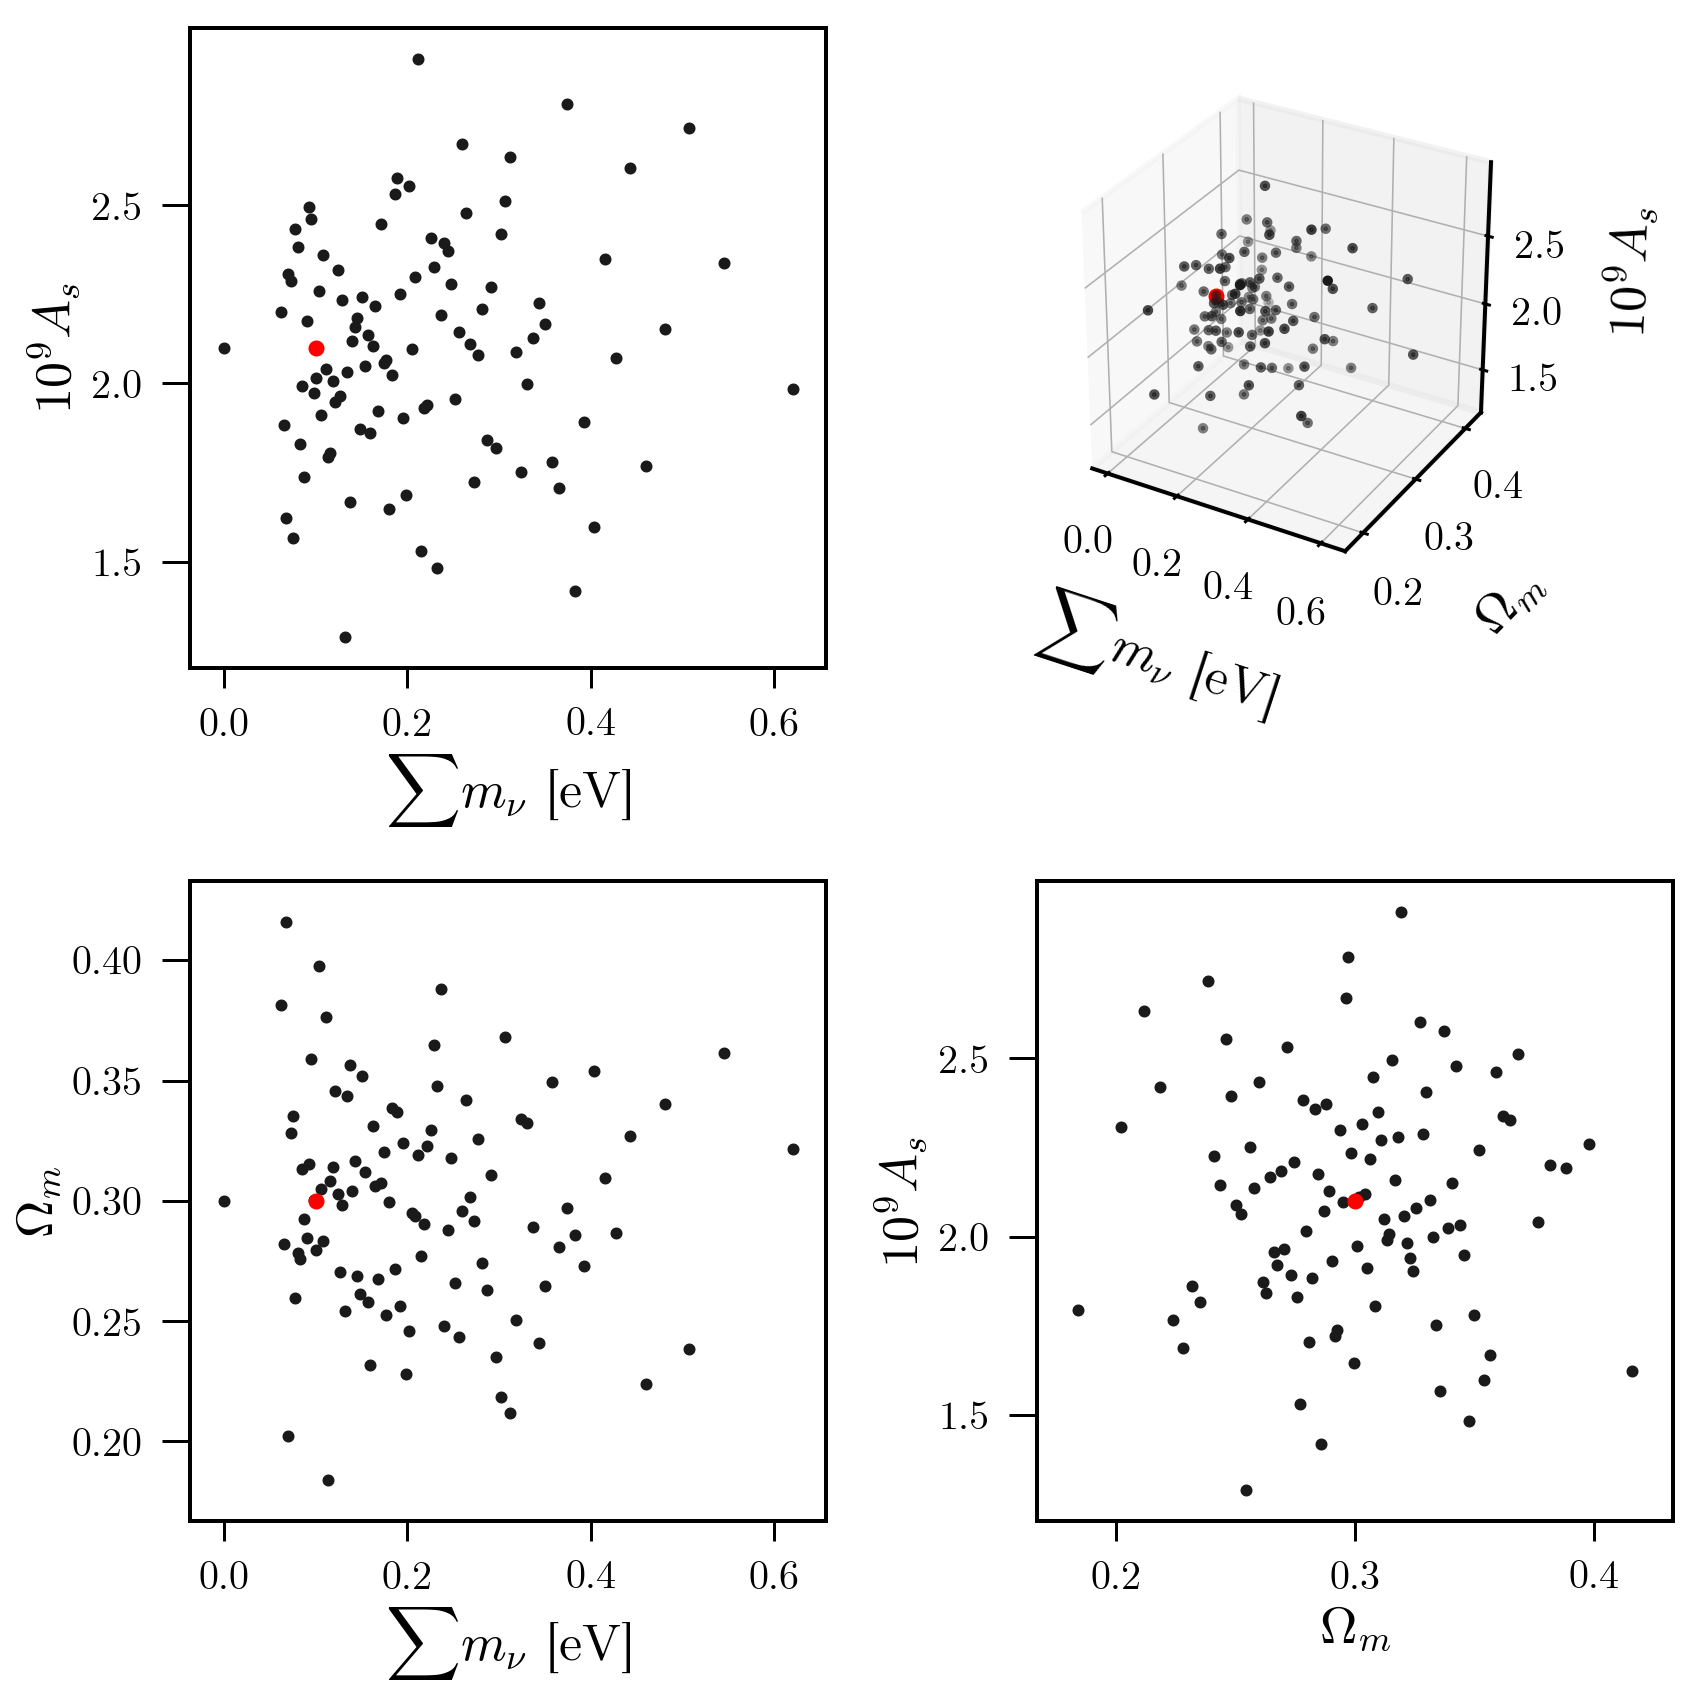

In [5]:
fig = plt.figure(figsize=(12,12))

ax3d = fig.add_subplot(2, 2, 2, projection='3d')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)
# ax = fig.add_subplot(2, 2, 2)

ax1.scatter( params[0], params[2] )
ax1.scatter( params[0][1], params[2][1], color="red", s=25 )
ax1.set_ylabel(r'$10^9 A_s$')
ax1.set_xlabel(r'$\sum m_{\nu}$ [eV]')
ax2.scatter( params[0], params[1] )
ax2.scatter( params[0][1], params[1][1], color="red", s=25 )

ax2.set_ylabel(r'$\Omega_m$')
ax2.set_xlabel(r'$\sum m_{\nu}$ [eV]')
ax3.scatter( params[1], params[2] )
ax3.set_ylabel(r'$10^9 A_s$')
ax3.set_xlabel(r'$\Omega_m$')
ax3.scatter( params[1][1], params[2][1], color="red", s=25 )

ax3d.scatter(params[0], params[1], params[2], s=5)
ax3d.scatter(params[0][1], params[1][1], params[2][1], color="red", s=25)
ax3d.set_xlabel(r'$\sum m_{\nu}$ [eV]', labelpad=30)
ax3d.set_ylabel(r'$\Omega_m$', labelpad=30)
ax3d.set_zlabel(r'$10^9 A_s$', labelpad=30)

plt.tight_layout()

ax3d.set_position(pos=(0.6,0.65,0.3,0.3))
plt.savefig("figures/parameters.pdf")

# PS5000 [2] vs. Peaks 2'[6]

[0.48419633] [0.2885422  0.31020773] [1.99885392 2.79525928]
[0.32298518] [0.29295161 0.31188692] [1.99330061 2.34096046]
[0.29506172] [0.29334579 0.3088128 ] [2.02112874 2.34358672]


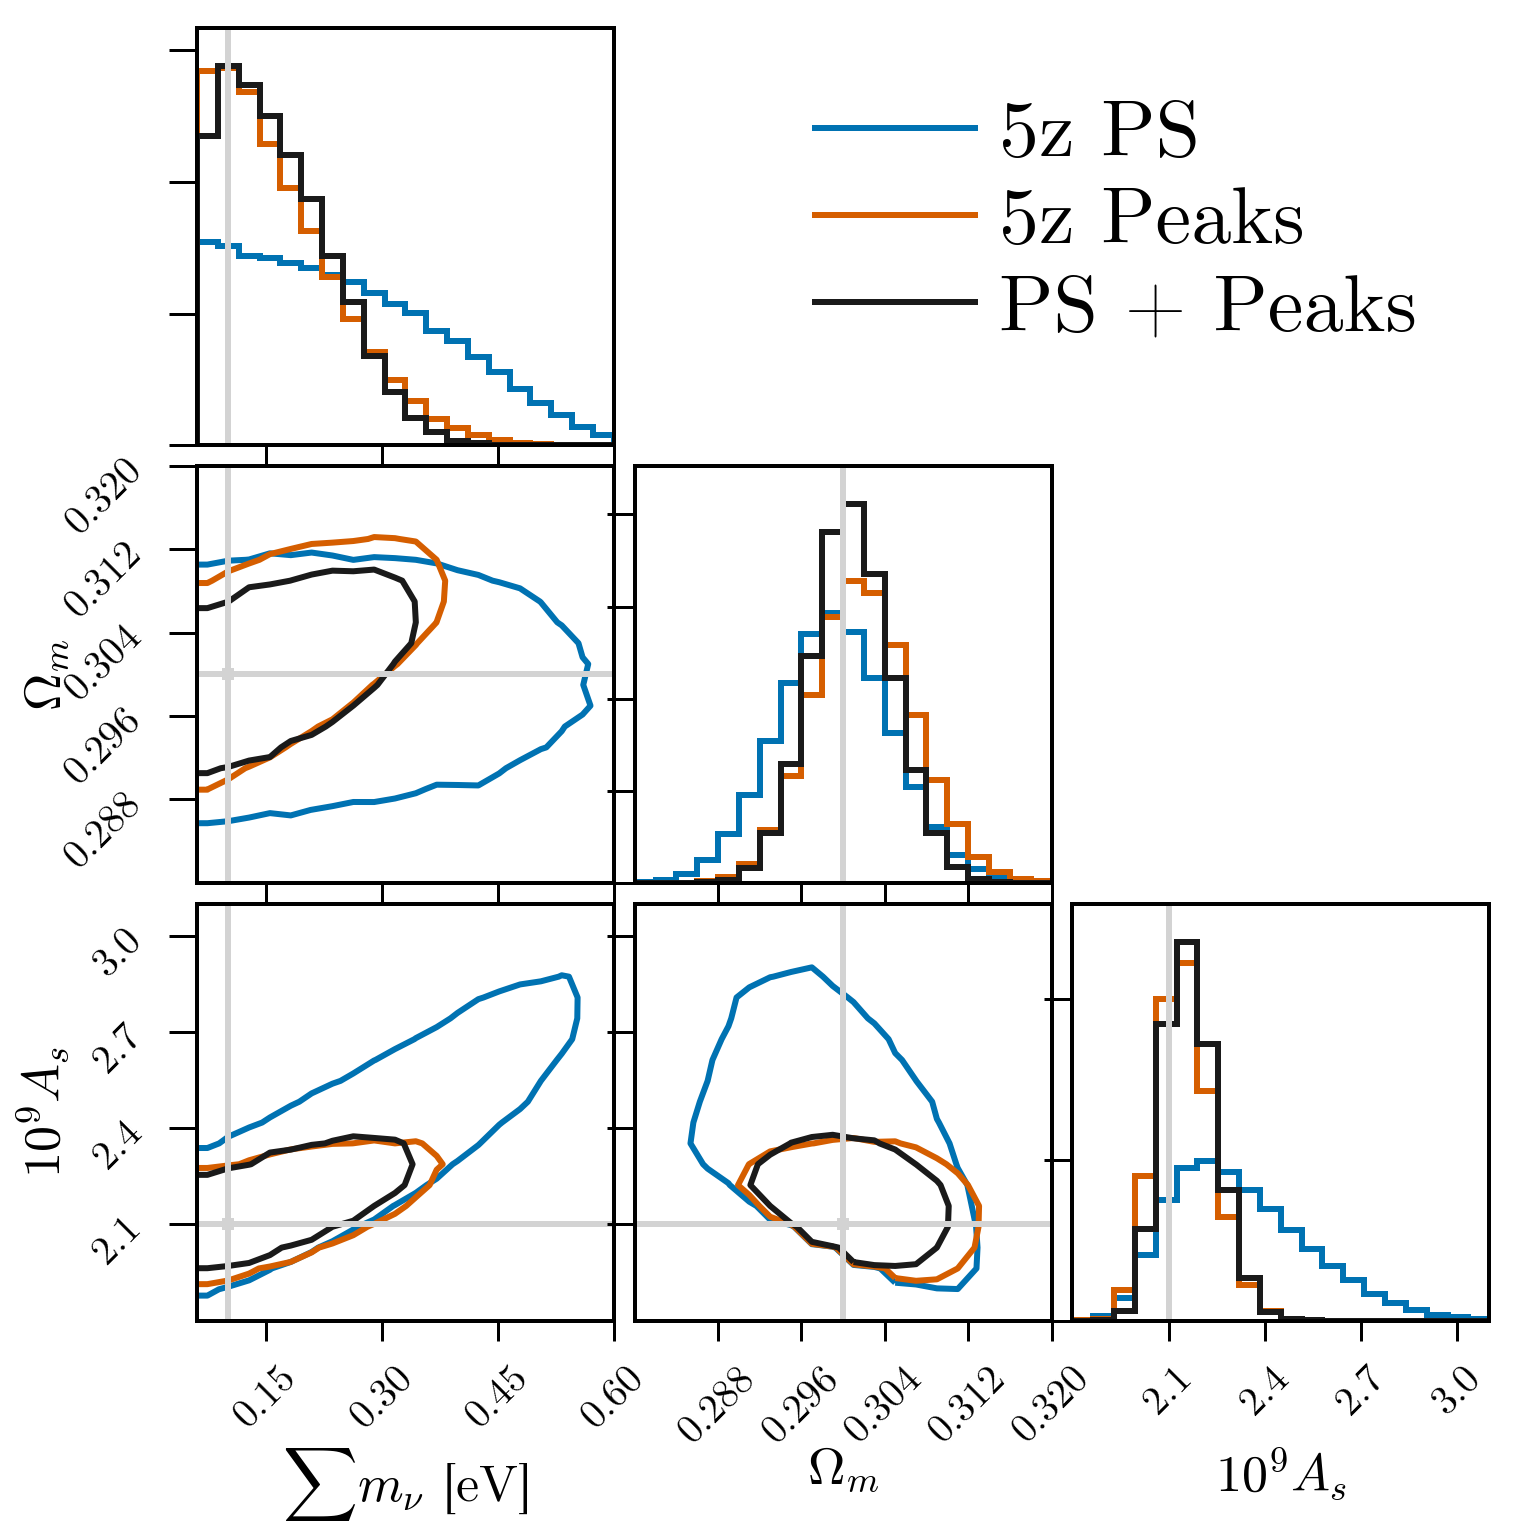

In [77]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

range_list = [ [0.06, 0.6], [0.28, 0.32],[1.8, 3.1] ]

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    range=range_list,
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1],
                    truth_color="#d3d3d3")

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    range=range_list,
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3],
                    truth_color="#d3d3d3")

chain = ascii.read("chains/combo12.out")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    range=range_list,
                    truths=params.T[1], fig=fig, 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0],
                    levels=(0.95,),
                    truth_color="#d3d3d3")


axes[0,2].plot([],[],color=default_color_list[1], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[3], label='5z Peaks')
axes[0,2].plot([],[],color=default_color_list[0], label='PS + Peaks')
axes[0,2].legend(fontsize=40)

for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale_view()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])
# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

fig.savefig('figures/PS_vs_Peaks_and_combined.pdf')

[3.4005240379340216, 80.49240999708775, 2.1800193726214547]

[0.52041988] [0.28647678 0.31368369] [1.96773234 2.85941377]
[0.48419633] [0.2885422  0.31020773] [1.99885392 2.79525928]
[0.45664599] [0.28890666 0.30997914] [1.99562216 2.73115763]


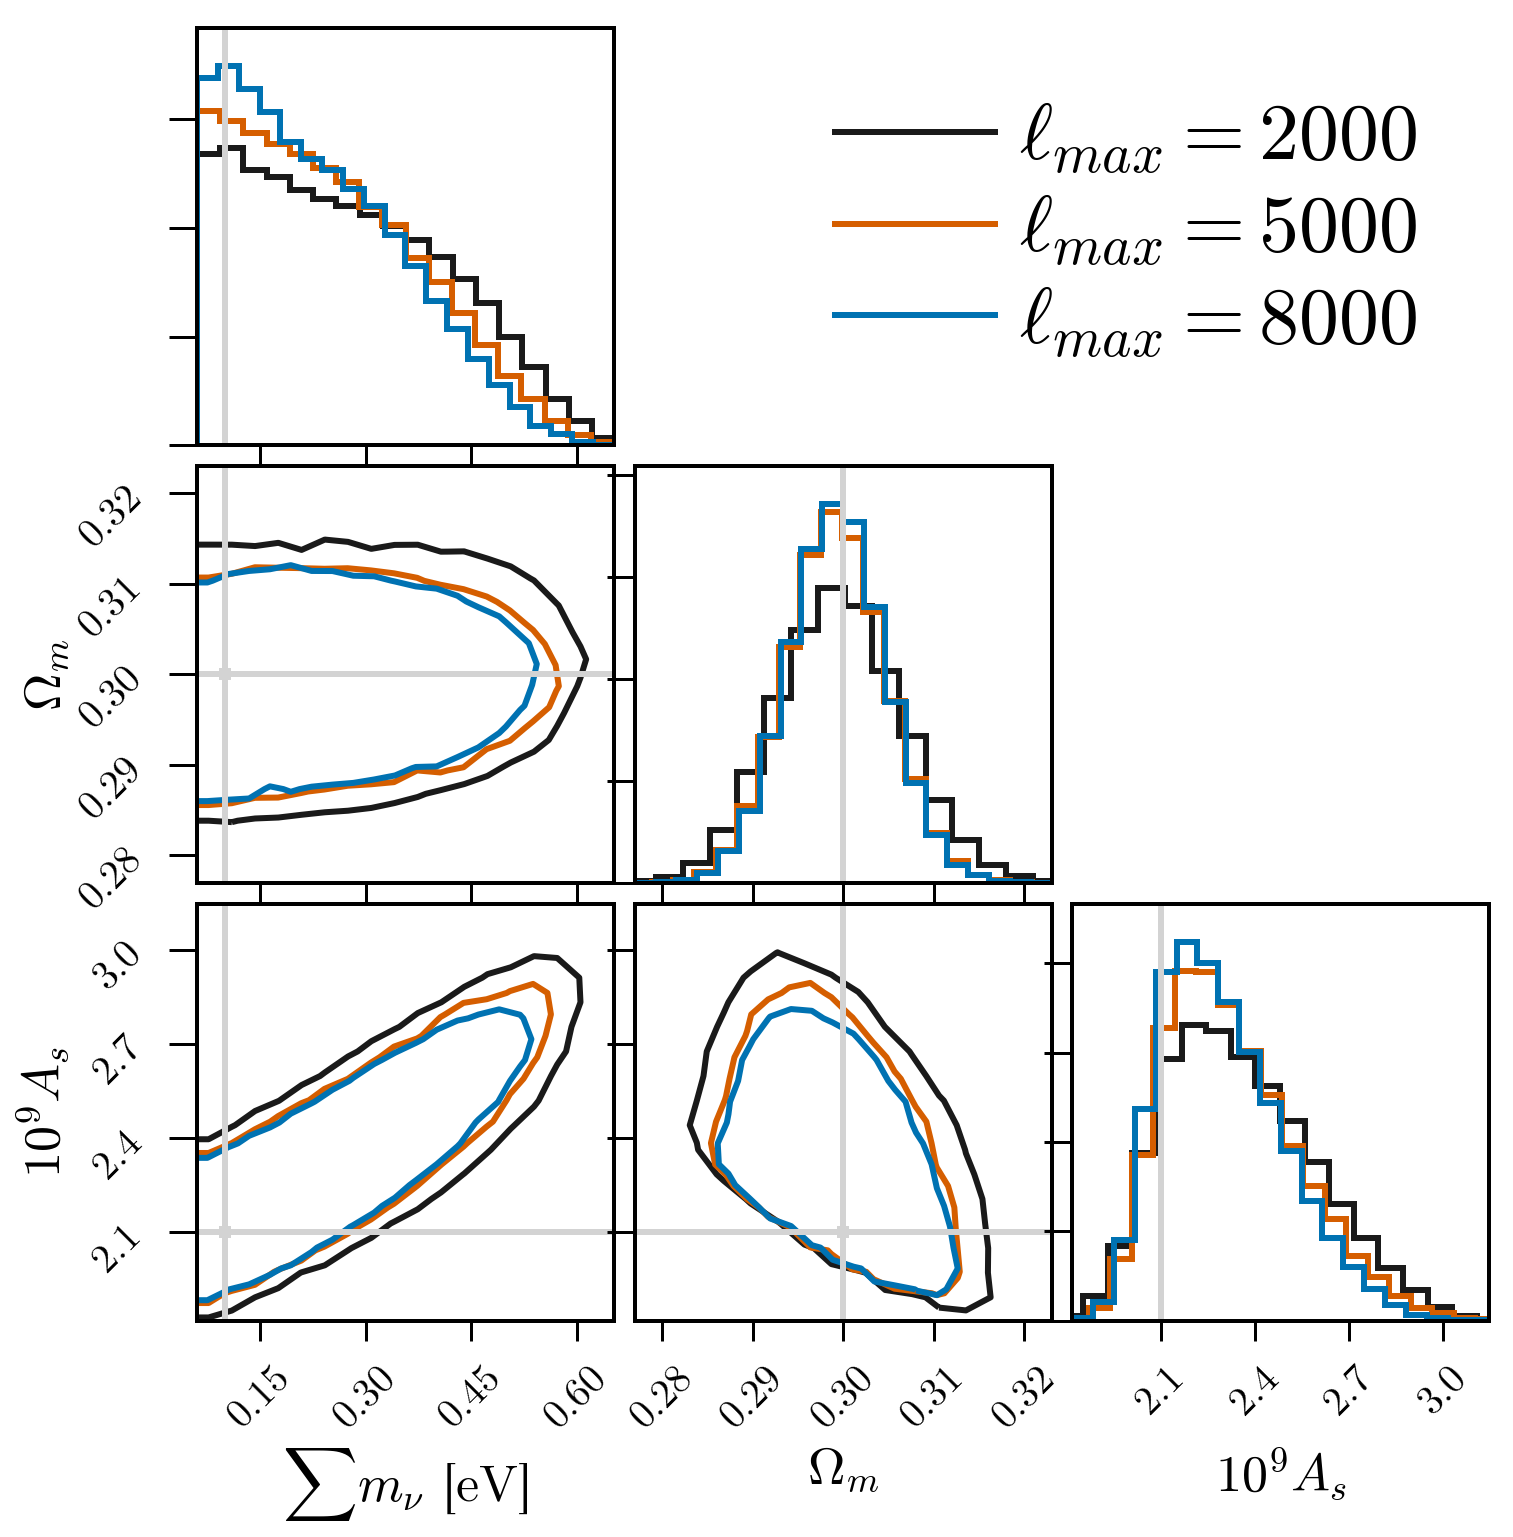

In [27]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_1_19020346.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/PS_3_19020348.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


axes[0,2].plot([],[],color=default_color_list[0], label=r'$\ell_{max} = 2000$')
axes[0,2].plot([],[],color=default_color_list[3], label=r'$\ell_{max} = 5000$')
axes[0,2].plot([],[],color=default_color_list[1], label=r'$\ell_{max} = 8000$')

axes[0,2].legend(fontsize=40)


# axlims = [fig.axes[i,i].get_ylim()[1] for i in range(3)]

for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale_view()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])
    
fig.savefig('figures/PS_ell.pdf')

# 3 Smoothing Scales [5,6,7]

[0.34131446] [0.29541177 0.31173083] [2.00435391 2.31611941]
[0.32298518] [0.29295161 0.31188692] [1.99330061 2.34096046]
[0.35548687] [0.28894937 0.31425967] [1.94948302 2.4626099 ]


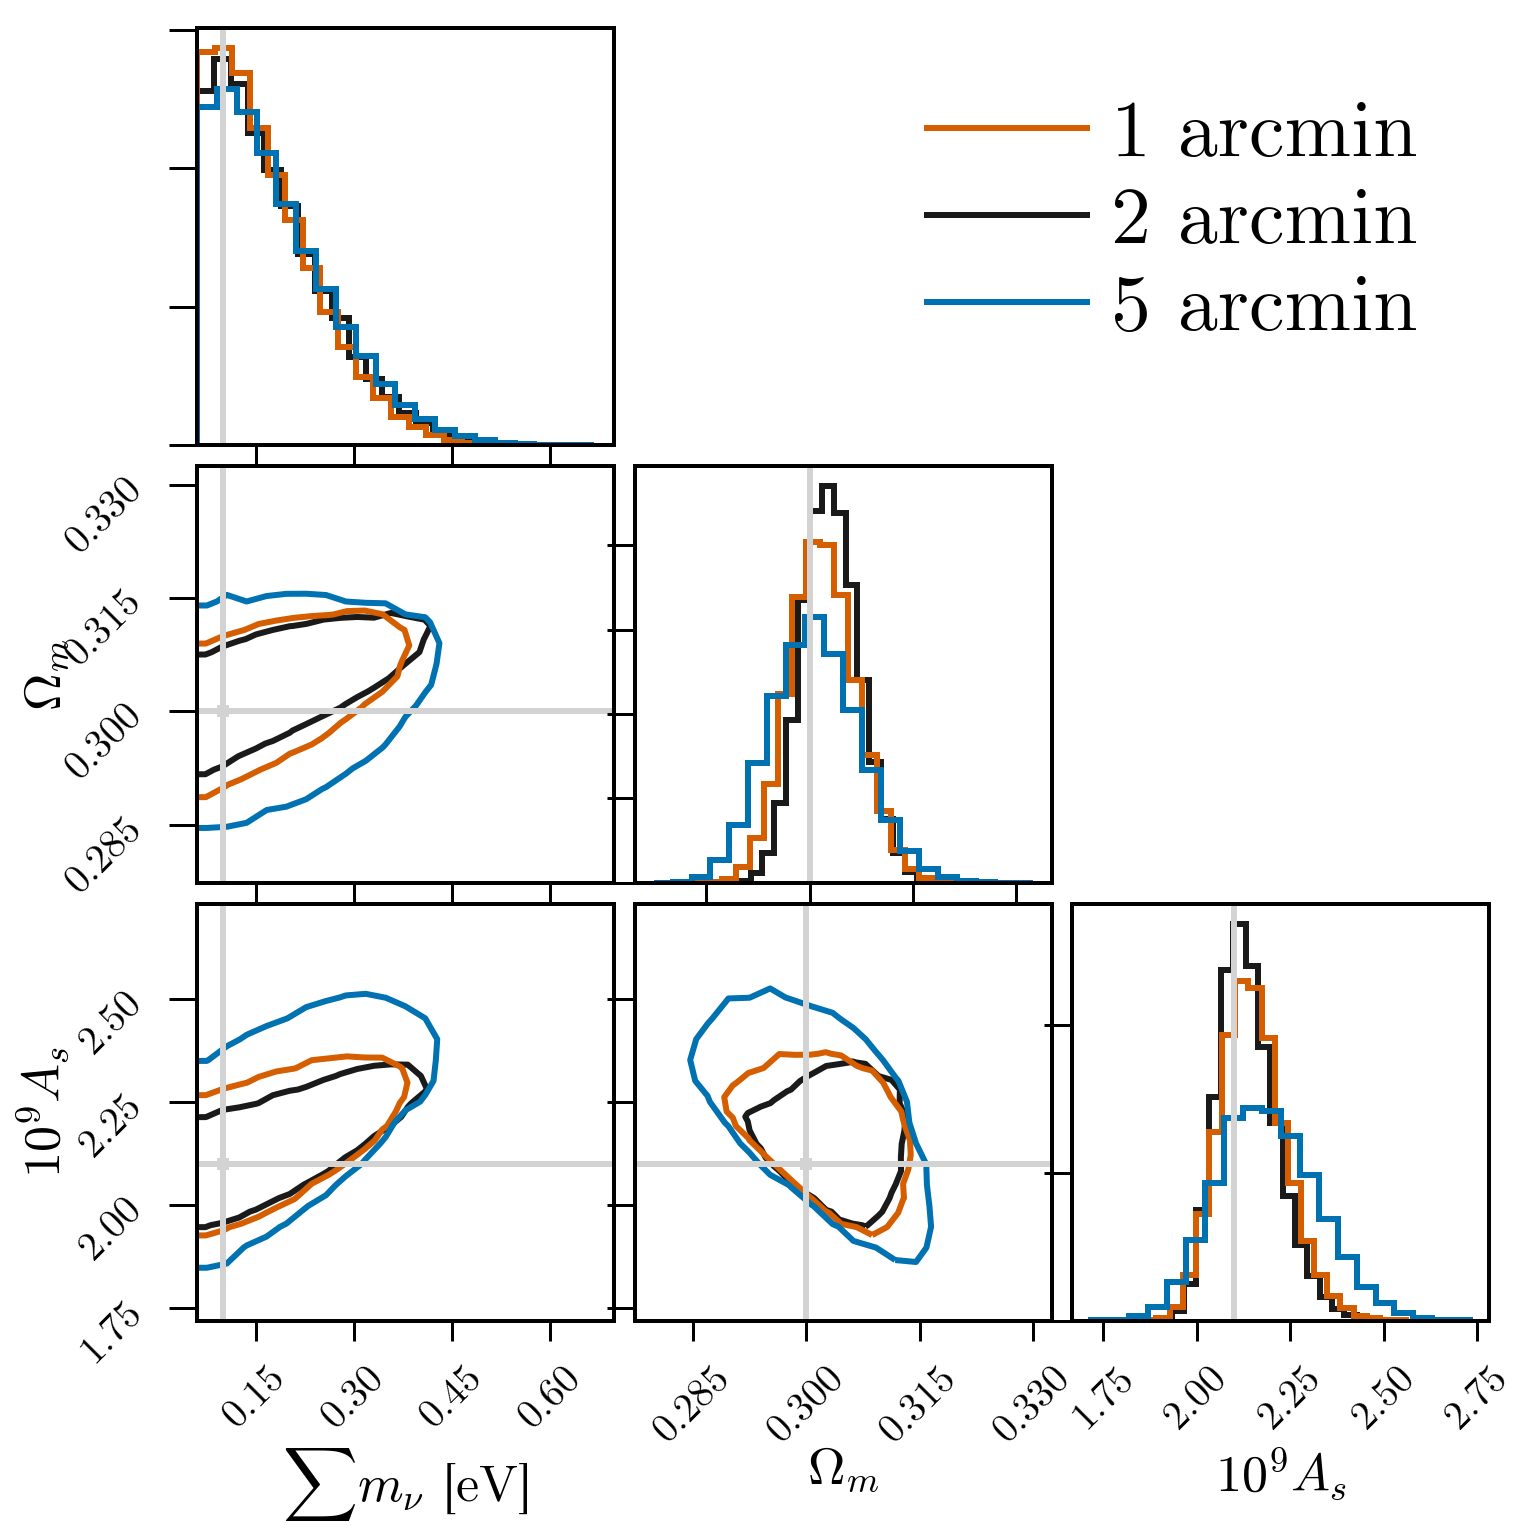

In [76]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/Peaks_5_19020341.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_7_19020343.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])
    
axes[0,2].plot([],[],color=default_color_list[3], label='1 arcmin')
axes[0,2].plot([],[],color=default_color_list[0], label='2 arcmin')
axes[0,2].plot([],[],color=default_color_list[1], label='5 arcmin')

axes[0,2].legend(fontsize=40)


fig.savefig('figures/Peaks_smoothing_scales.pdf')

# Comparison of PS ngal40 and 5z

[0.48419633] [0.2885422  0.31020773] [1.99885392 2.79525928]
[0.55333823] [0.27789704 0.32731399] [1.8100404  3.01899376]


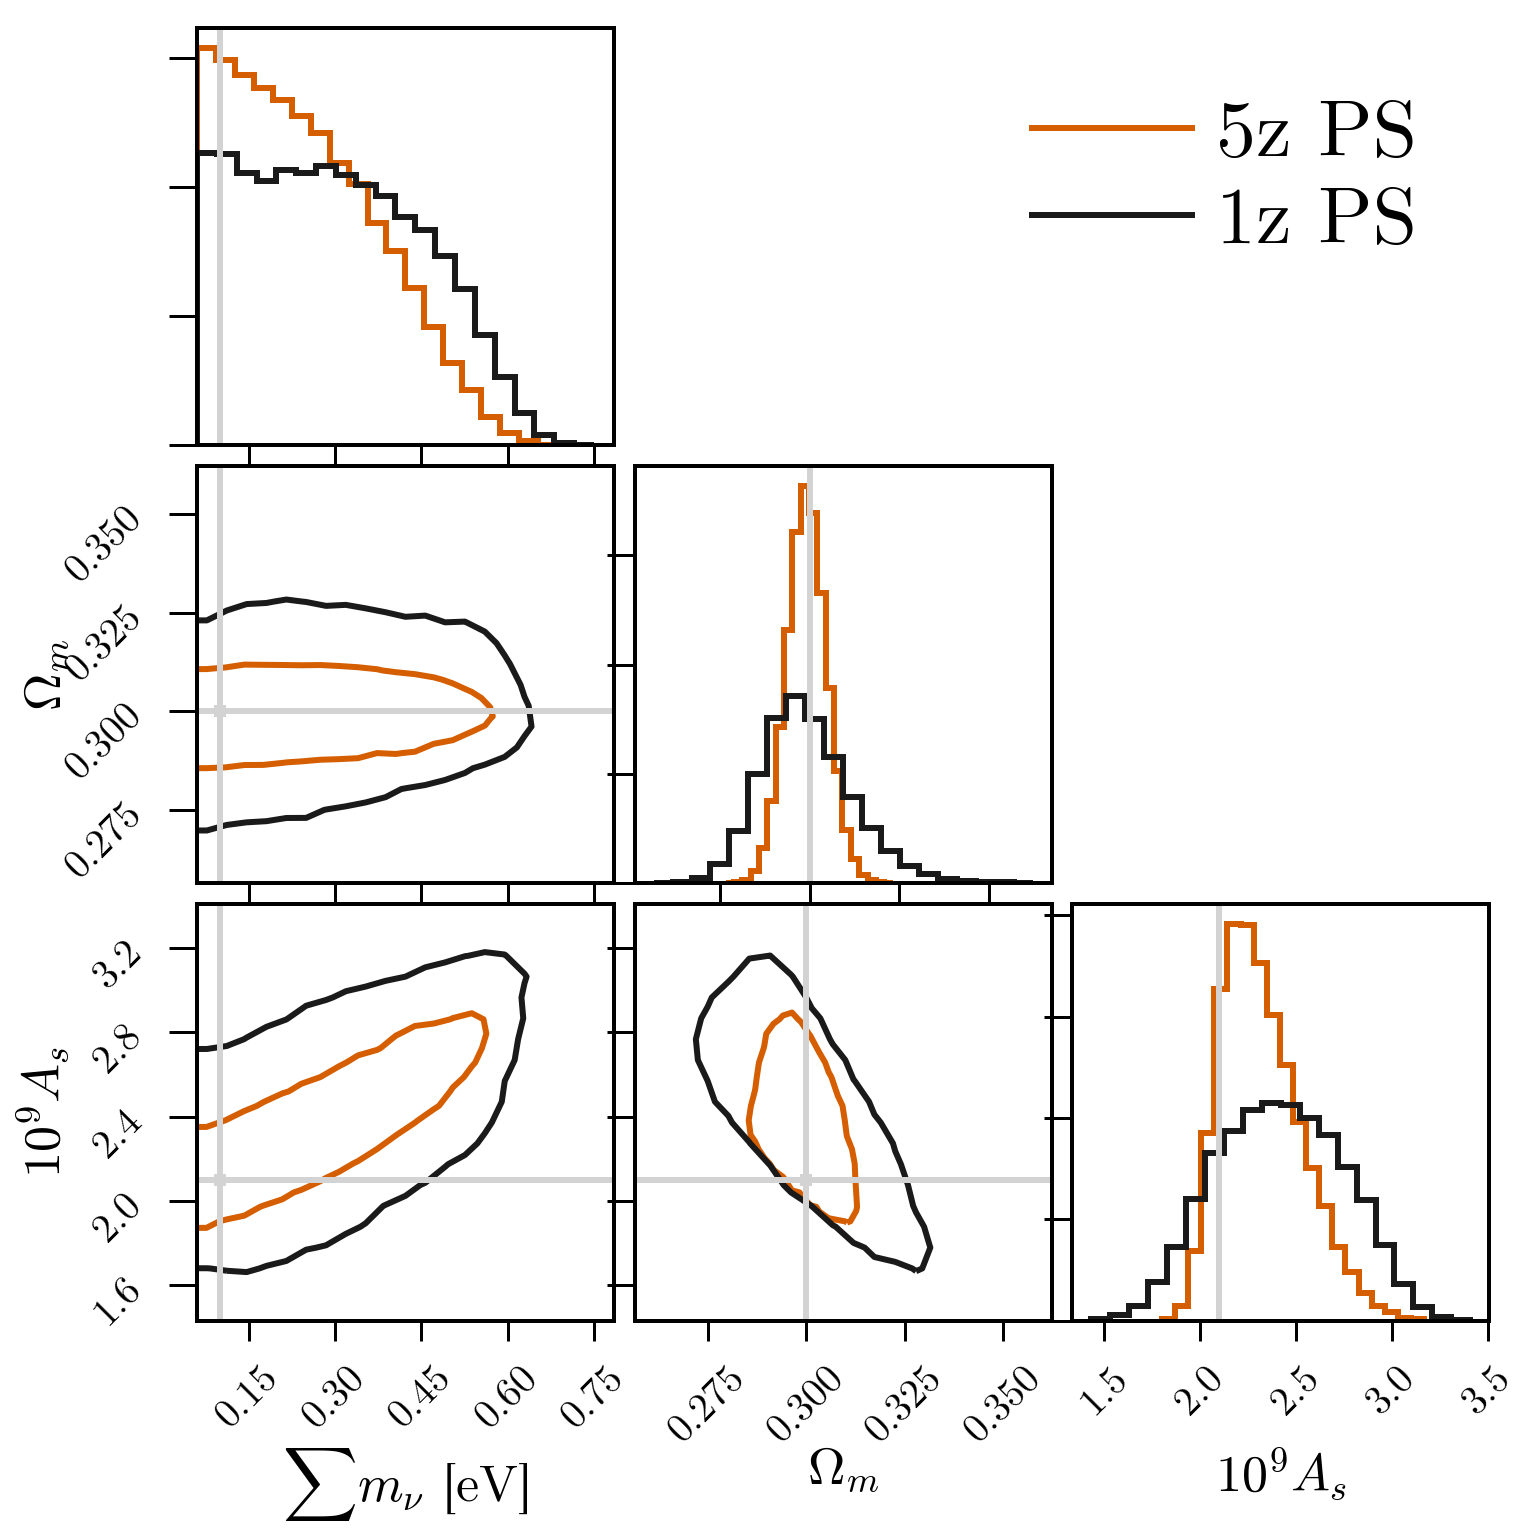

In [78]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/PS_4_19020349.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[0], label='1z PS')
axes[0,2].legend(fontsize=40)


for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

fig.savefig('figures/PS_tomography.pdf')

[0.32298518] [0.29295161 0.31188692] [1.99330061 2.34096046]
[0.53969428] [0.29232911 0.32290445] [1.97904499 2.52382504]


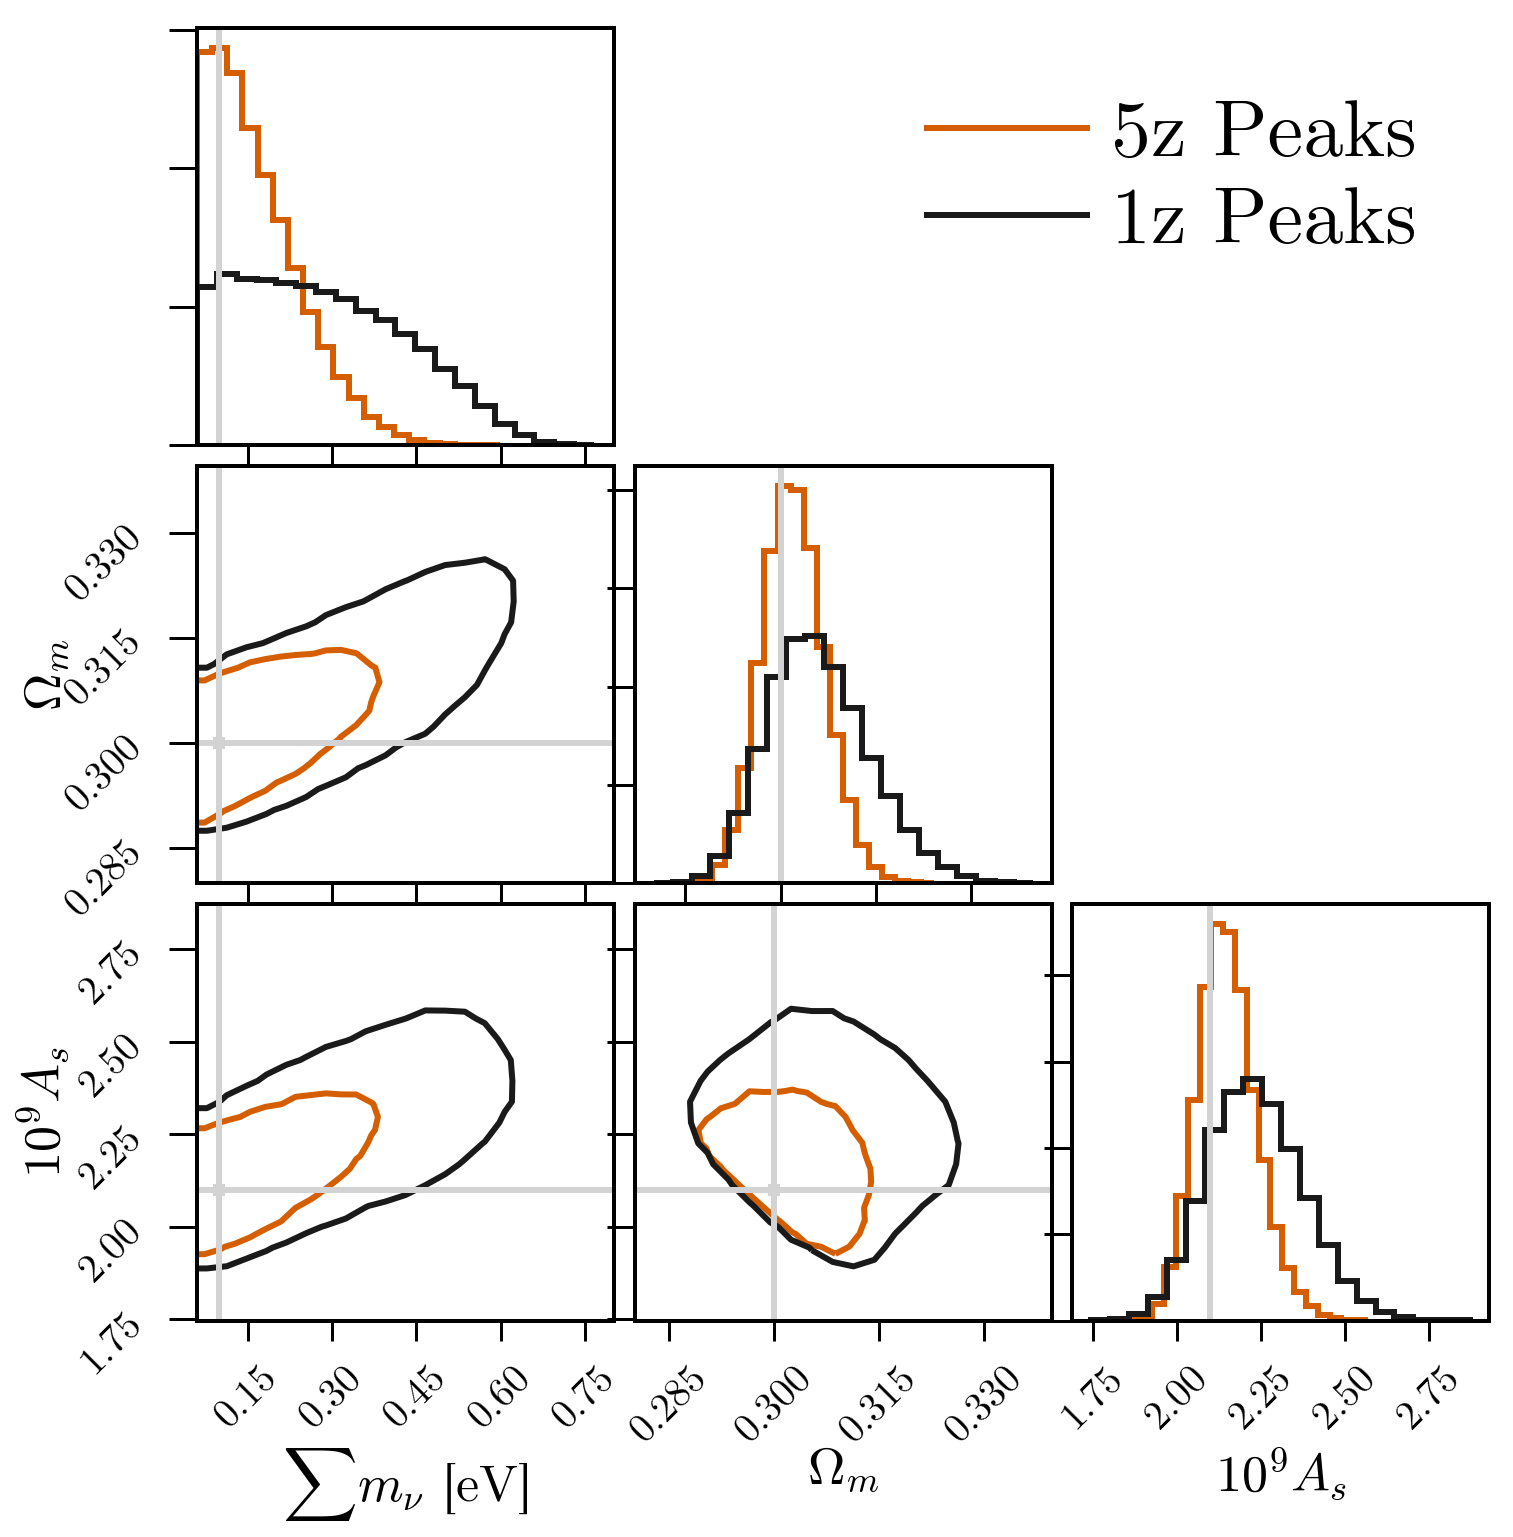

In [81]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])


chain = ascii.read("chains/Peaks_11_19030881.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[3], label='5z Peaks')
axes[0,2].plot([],[],color=default_color_list[0], label='1z Peaks')
axes[0,2].legend(fontsize=40)

for i in range(3):
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

fig.savefig('figures/Peaks_tomography.pdf')

# Peaks low / med / high

[0.45414796] [0.28973073 0.32402322] [1.90116907 2.45394005]
[0.56101054] [0.28895009 0.32249052] [1.93605112 2.67159884]
[0.56379221] [0.28303407 0.32003759] [1.93447978 2.8603352 ]
[0.32298518] [0.29295161 0.31188692] [1.99330061 2.34096046]


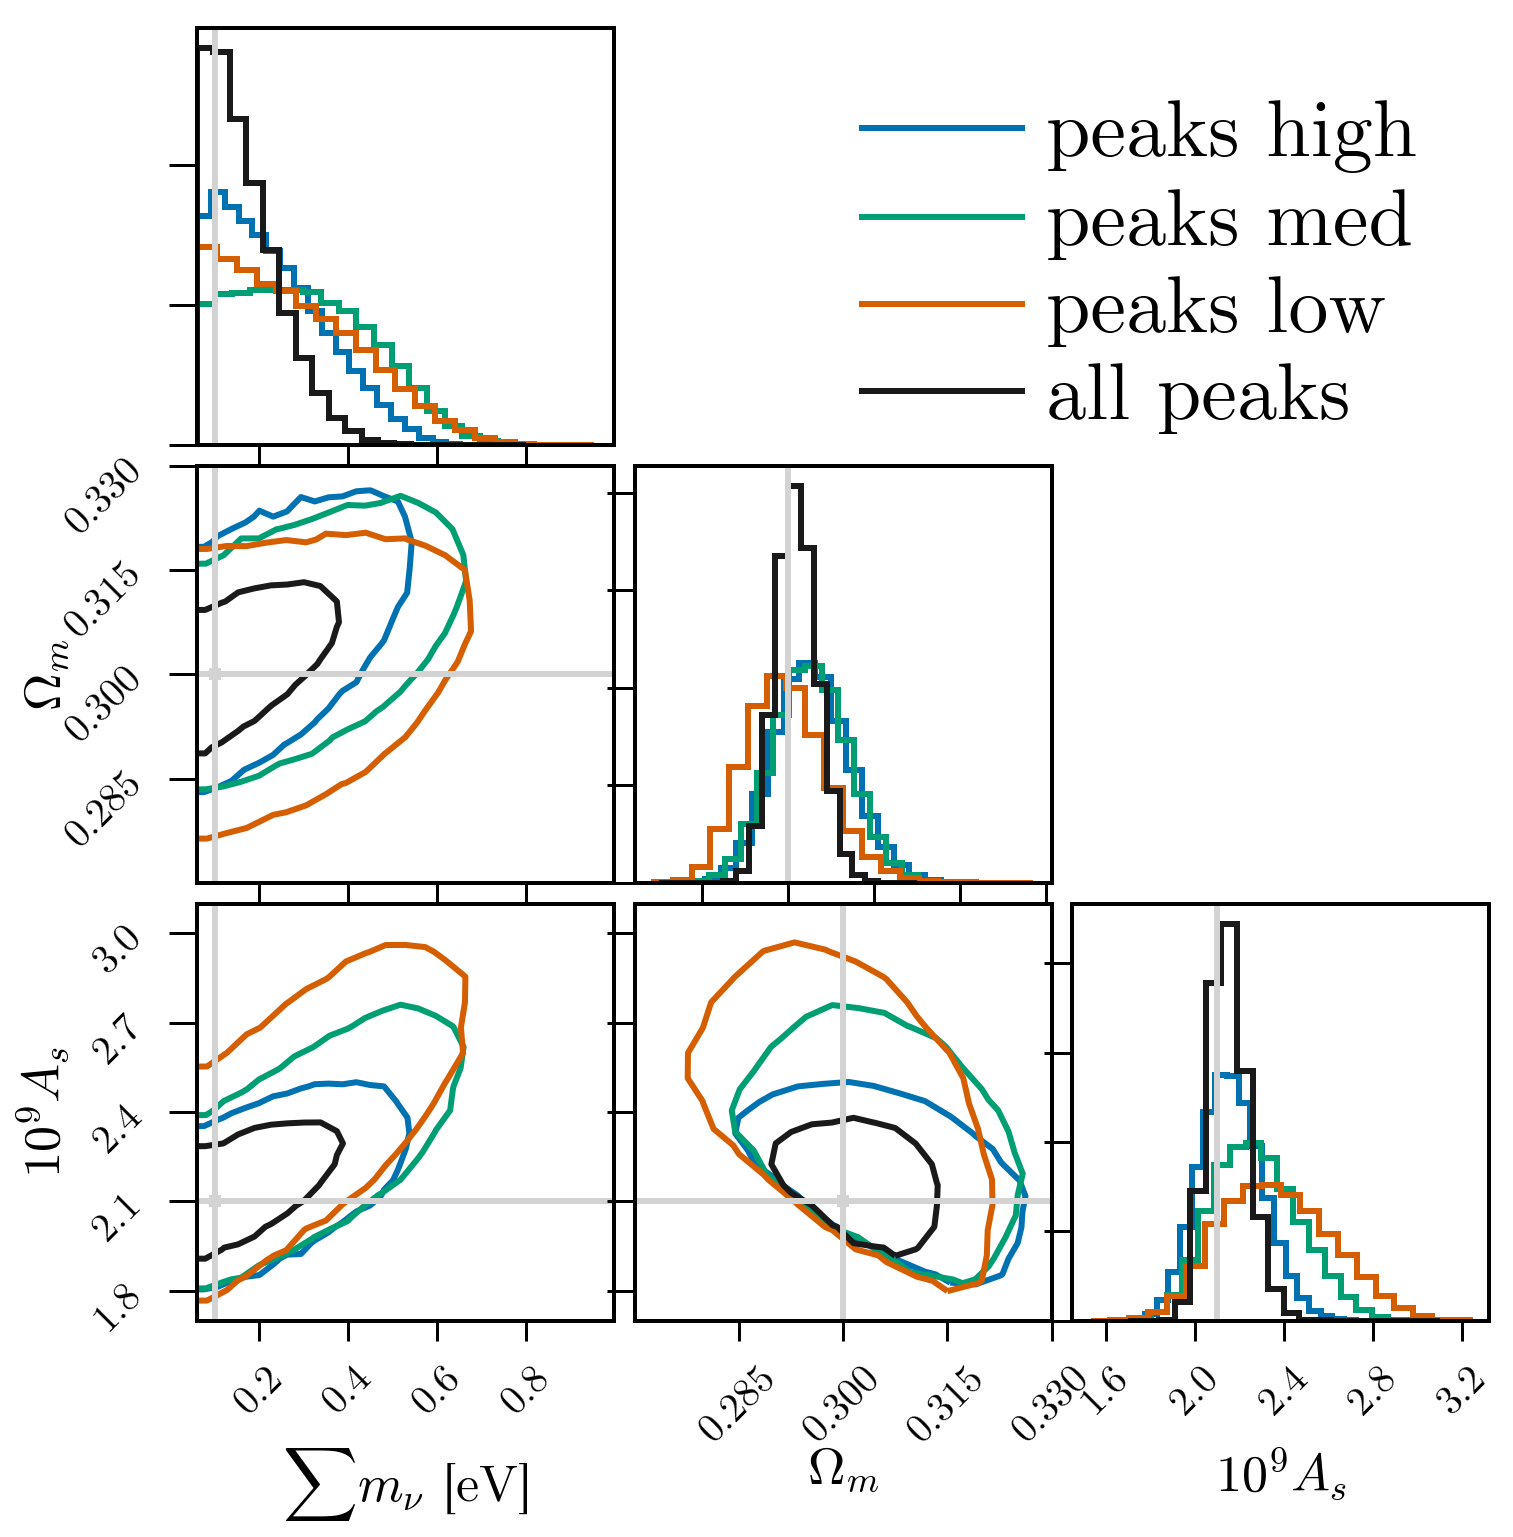

In [80]:
fig, axes = plt.subplots(3,3, figsize=(11,11))


range_list = [ [0.06, 0.8], [0.27, 0.33],[1.7, 3.1] ]
chain = ascii.read("chains/Peaks_10_high_19030880.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])

chain = ascii.read("chains/Peaks_9_med_19030883.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[2])

chain = ascii.read("chains/Peaks_8_low_19030882.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    range=range_list,
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


axes[0,2].plot([],[],color=default_color_list[1], label='peaks high')
axes[0,2].plot([],[],color=default_color_list[2], label='peaks med')
axes[0,2].plot([],[],color=default_color_list[3], label='peaks low')
axes[0,2].plot([],[],color=default_color_list[0], label='all peaks')

axes[0,2].legend(fontsize=40)

for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale()
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

fig.savefig('figures/peak_height_compare.pdf')

# CMB Priors

In [33]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'sum_mnu'])
centers = np.array([0.02254,  0.1234,  0.7,  2.1e-9, 0.97, 0.06, 0.1])
left_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.02])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl mPk',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'halofit',
                 'reionization_optical_depth_tol': 1e-07,
                 'tol_background_integration': 1e-8,
                 'tol_perturb_integration': 1e-8,
                 'tol_thermo_integration': 1e-8,
              
                 'perturb_sampling_stepsize':0.01,
                 'k_max_tau0_over_l_max' : 6,
                   
                  'P_k_max_1/Mpc':3.0
                  }
# classy_template.update(fishchips.util.PRECISE_CLASS_DICT)

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [35]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial',
                  classy_dict=fishchips.util.neutrino_dict(classy_template))

In [36]:
c = obs.cosmos['fiducial']
c.Omega0_m()

0.3000281903167247

In [37]:
# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_left',
                      classy_dict=fishchips.util.neutrino_dict(classy_left))
    obs.compute_cosmo(key=par + '_right',
                      classy_dict=fishchips.util.neutrino_dict(classy_right))

In [38]:

pars = np.array( ['omega_b', 'Omega_m', 'h',  'A_s', 'n_s', 'tau_reio', 'sum_mnu'])
fid_Om = obs.cosmos['fiducial'].Omega0_m()
centers = np.array([0.02254,  fid_Om,  0.7,  2.1e-9, 0.97, 0.06, 0.1])
left_steps = np.array([0.0008, abs(fid_Om-
                           obs.cosmos['omega_cdm_left'].Omega0_m()),   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008,abs(fid_Om-
                           obs.cosmos['omega_cdm_right'].Omega0_m()),   0.02,   0.1e-9, 0.01, 0.02, 0.02])

obs.parameters = pars
obs.fiducial = centers
obs.left = centers - left_steps
obs.right = centers + right_steps

obs.cosmos['Omega_m_left'] = obs.cosmos['omega_cdm_left']
obs.cosmos['Omega_m_right'] = obs.cosmos['omega_cdm_right']

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_3500_20181002.pkl
Loaded cached Cls from  output/clphi_low_acc_False_3500_20181002.txt

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{Omega\\_m}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{sum\\_mnu}$']


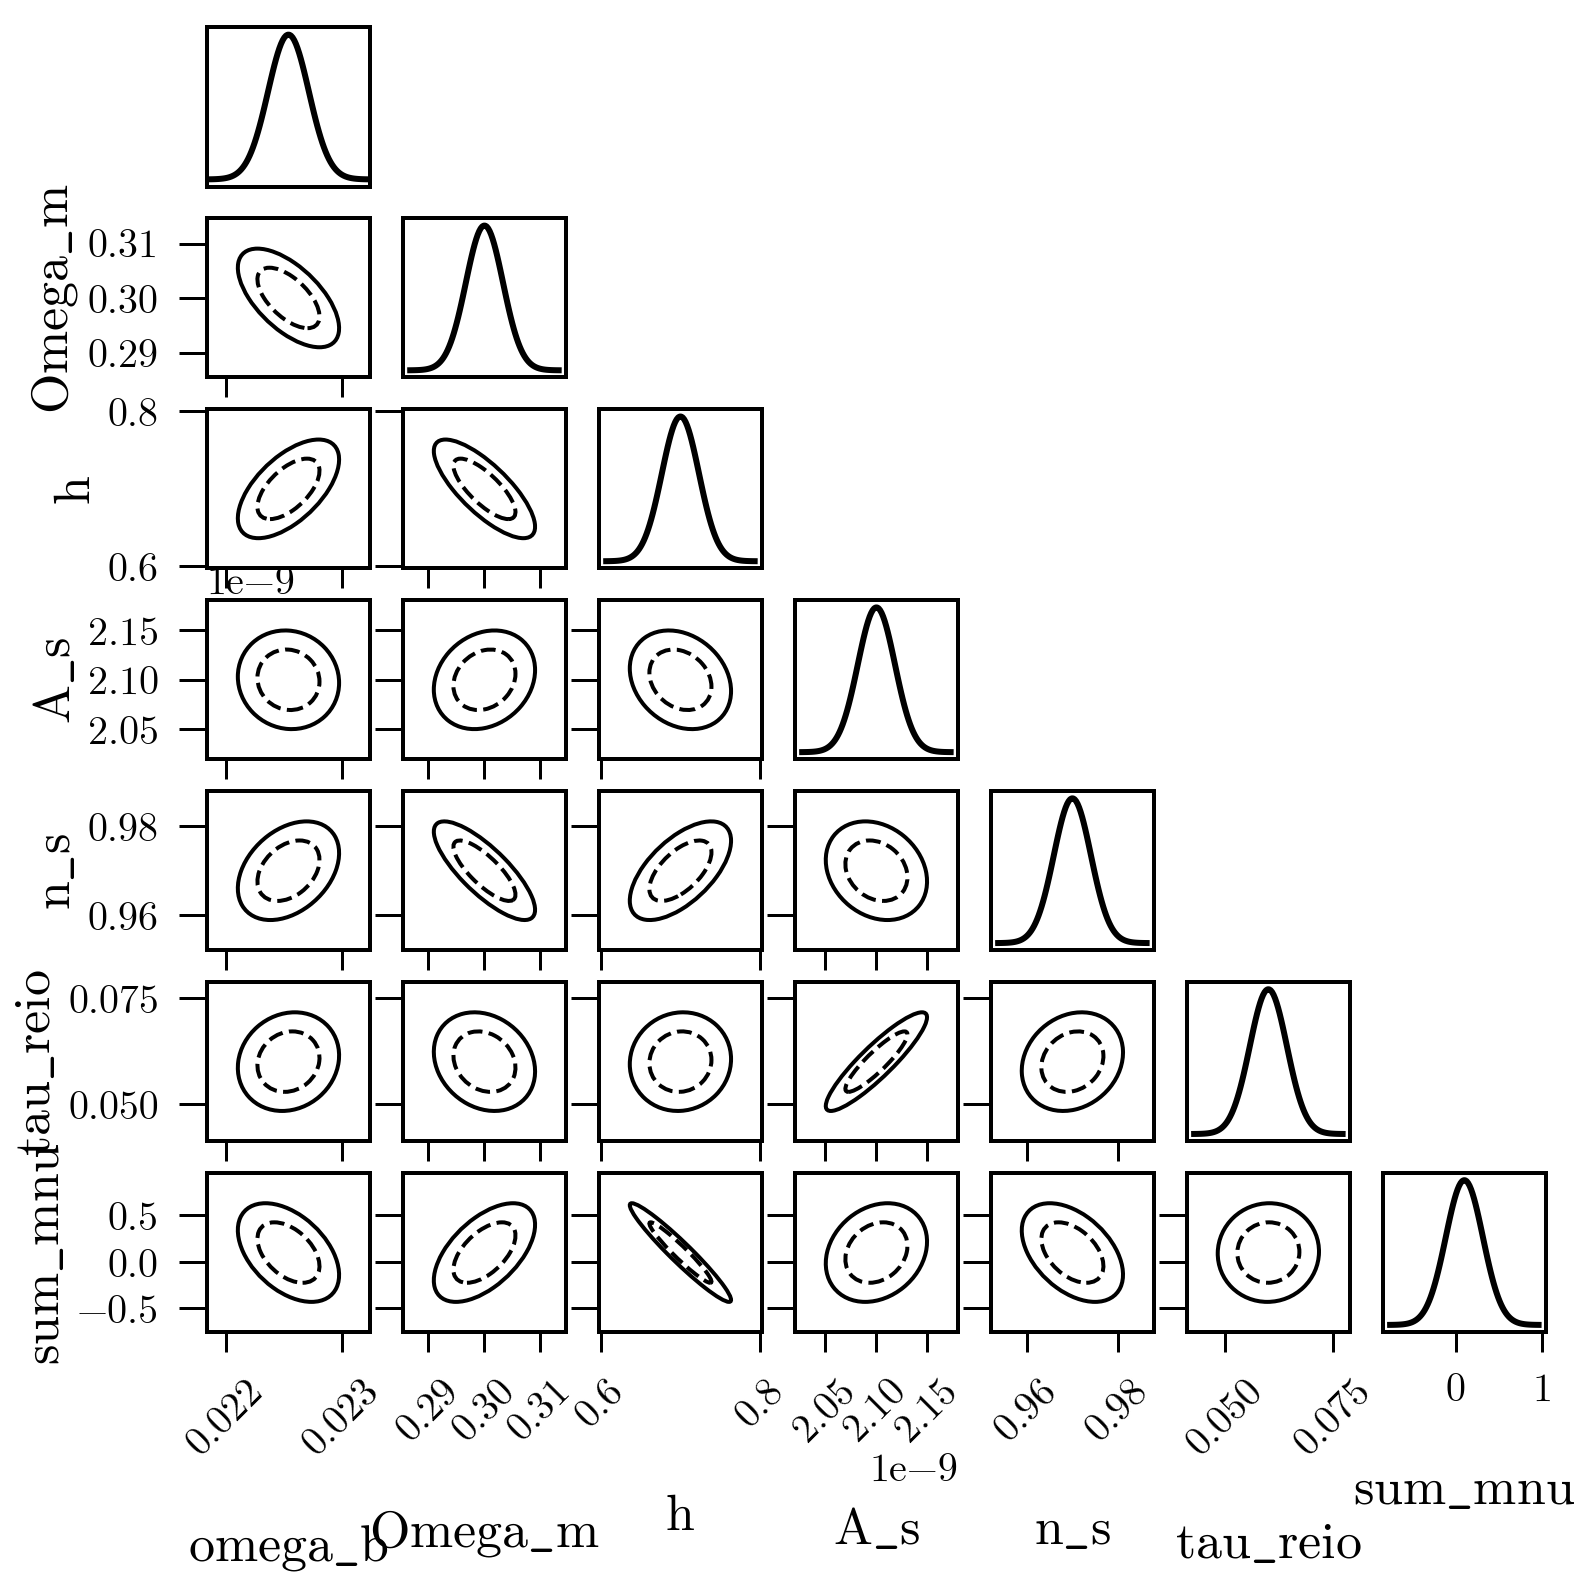

In [42]:

Allison_Planck = [fishchips.experiments.CMB_Primary(l_min=2, 
                                                l_max=2500, f_sky=0.44),
                     fishchips.cmb_lensing.CMB_Lensing_Only(lens_kmax=2000, 
                                                            lens_tellmax=2500, 
                                                            lens_pellmax=2500, 
                                                            lens_f_sky=0.44)]
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=True) for exp in Allison_Planck], axis=0 )
cov = np.linalg.inv(fisher)
fishchips.util.plot_triangle(obs, cov);

In [43]:
np.sqrt( cov[-1,-1])

0.2137377820369257

In [44]:
import corner

def unitize_cov(imp_cov, scales):
    imp_cov = imp_cov.copy()
    npar = imp_cov.shape[0]
    for i in range(npar):
        for j in range(npar):
            imp_cov[i,j] *= scales[i] * scales[j]
    return imp_cov

def get_samps(inp_cov, inp_means, num=int(1e8)):
    """
    Generate samples from a covariance matrix and input means.
    
    Parameters
    ----------
        inp_cov (2D numpy array) : covariance matrix from Fisher
        inp_means (1D numpy array) : mean values (mu), fiducial from Fisher
        
    Returns
    -------
        2D numpy array with each row corresponding to one random draw 
        from the multivariate Gaussian
    """
    samps = np.random.multivariate_normal( np.array(inp_means)/np.sqrt(np.diag(inp_cov)), 
                                           unitize_cov(inp_cov,1./np.sqrt(np.diag(inp_cov))), int(1e7))
#     samps = samps[samps.T[-1]>0]
    for i in range(inp_cov.shape[0]):
        samps.T[i] *= np.sqrt(inp_cov[i,i])
        
    return samps

In [45]:
subcov = cov[:, [6,1,3]][[6,1,3],:]
subcenters = centers[[6,1,3]]

In [46]:
subcov

array([[4.56838395e-02, 4.39182676e-04, 9.47263808e-13],
       [4.39182676e-04, 1.32931049e-05, 1.44615555e-14],
       [9.47263808e-13, 1.44615555e-14, 4.01324205e-22]])

In [47]:
samps = get_samps(cov, centers)
subsamps = get_samps(subcov, subcenters)

samps = samps[samps[:,-1]>0]
subsamps = subsamps[subsamps[:,0]>0]
subsamps[:,-1] *= 1e9

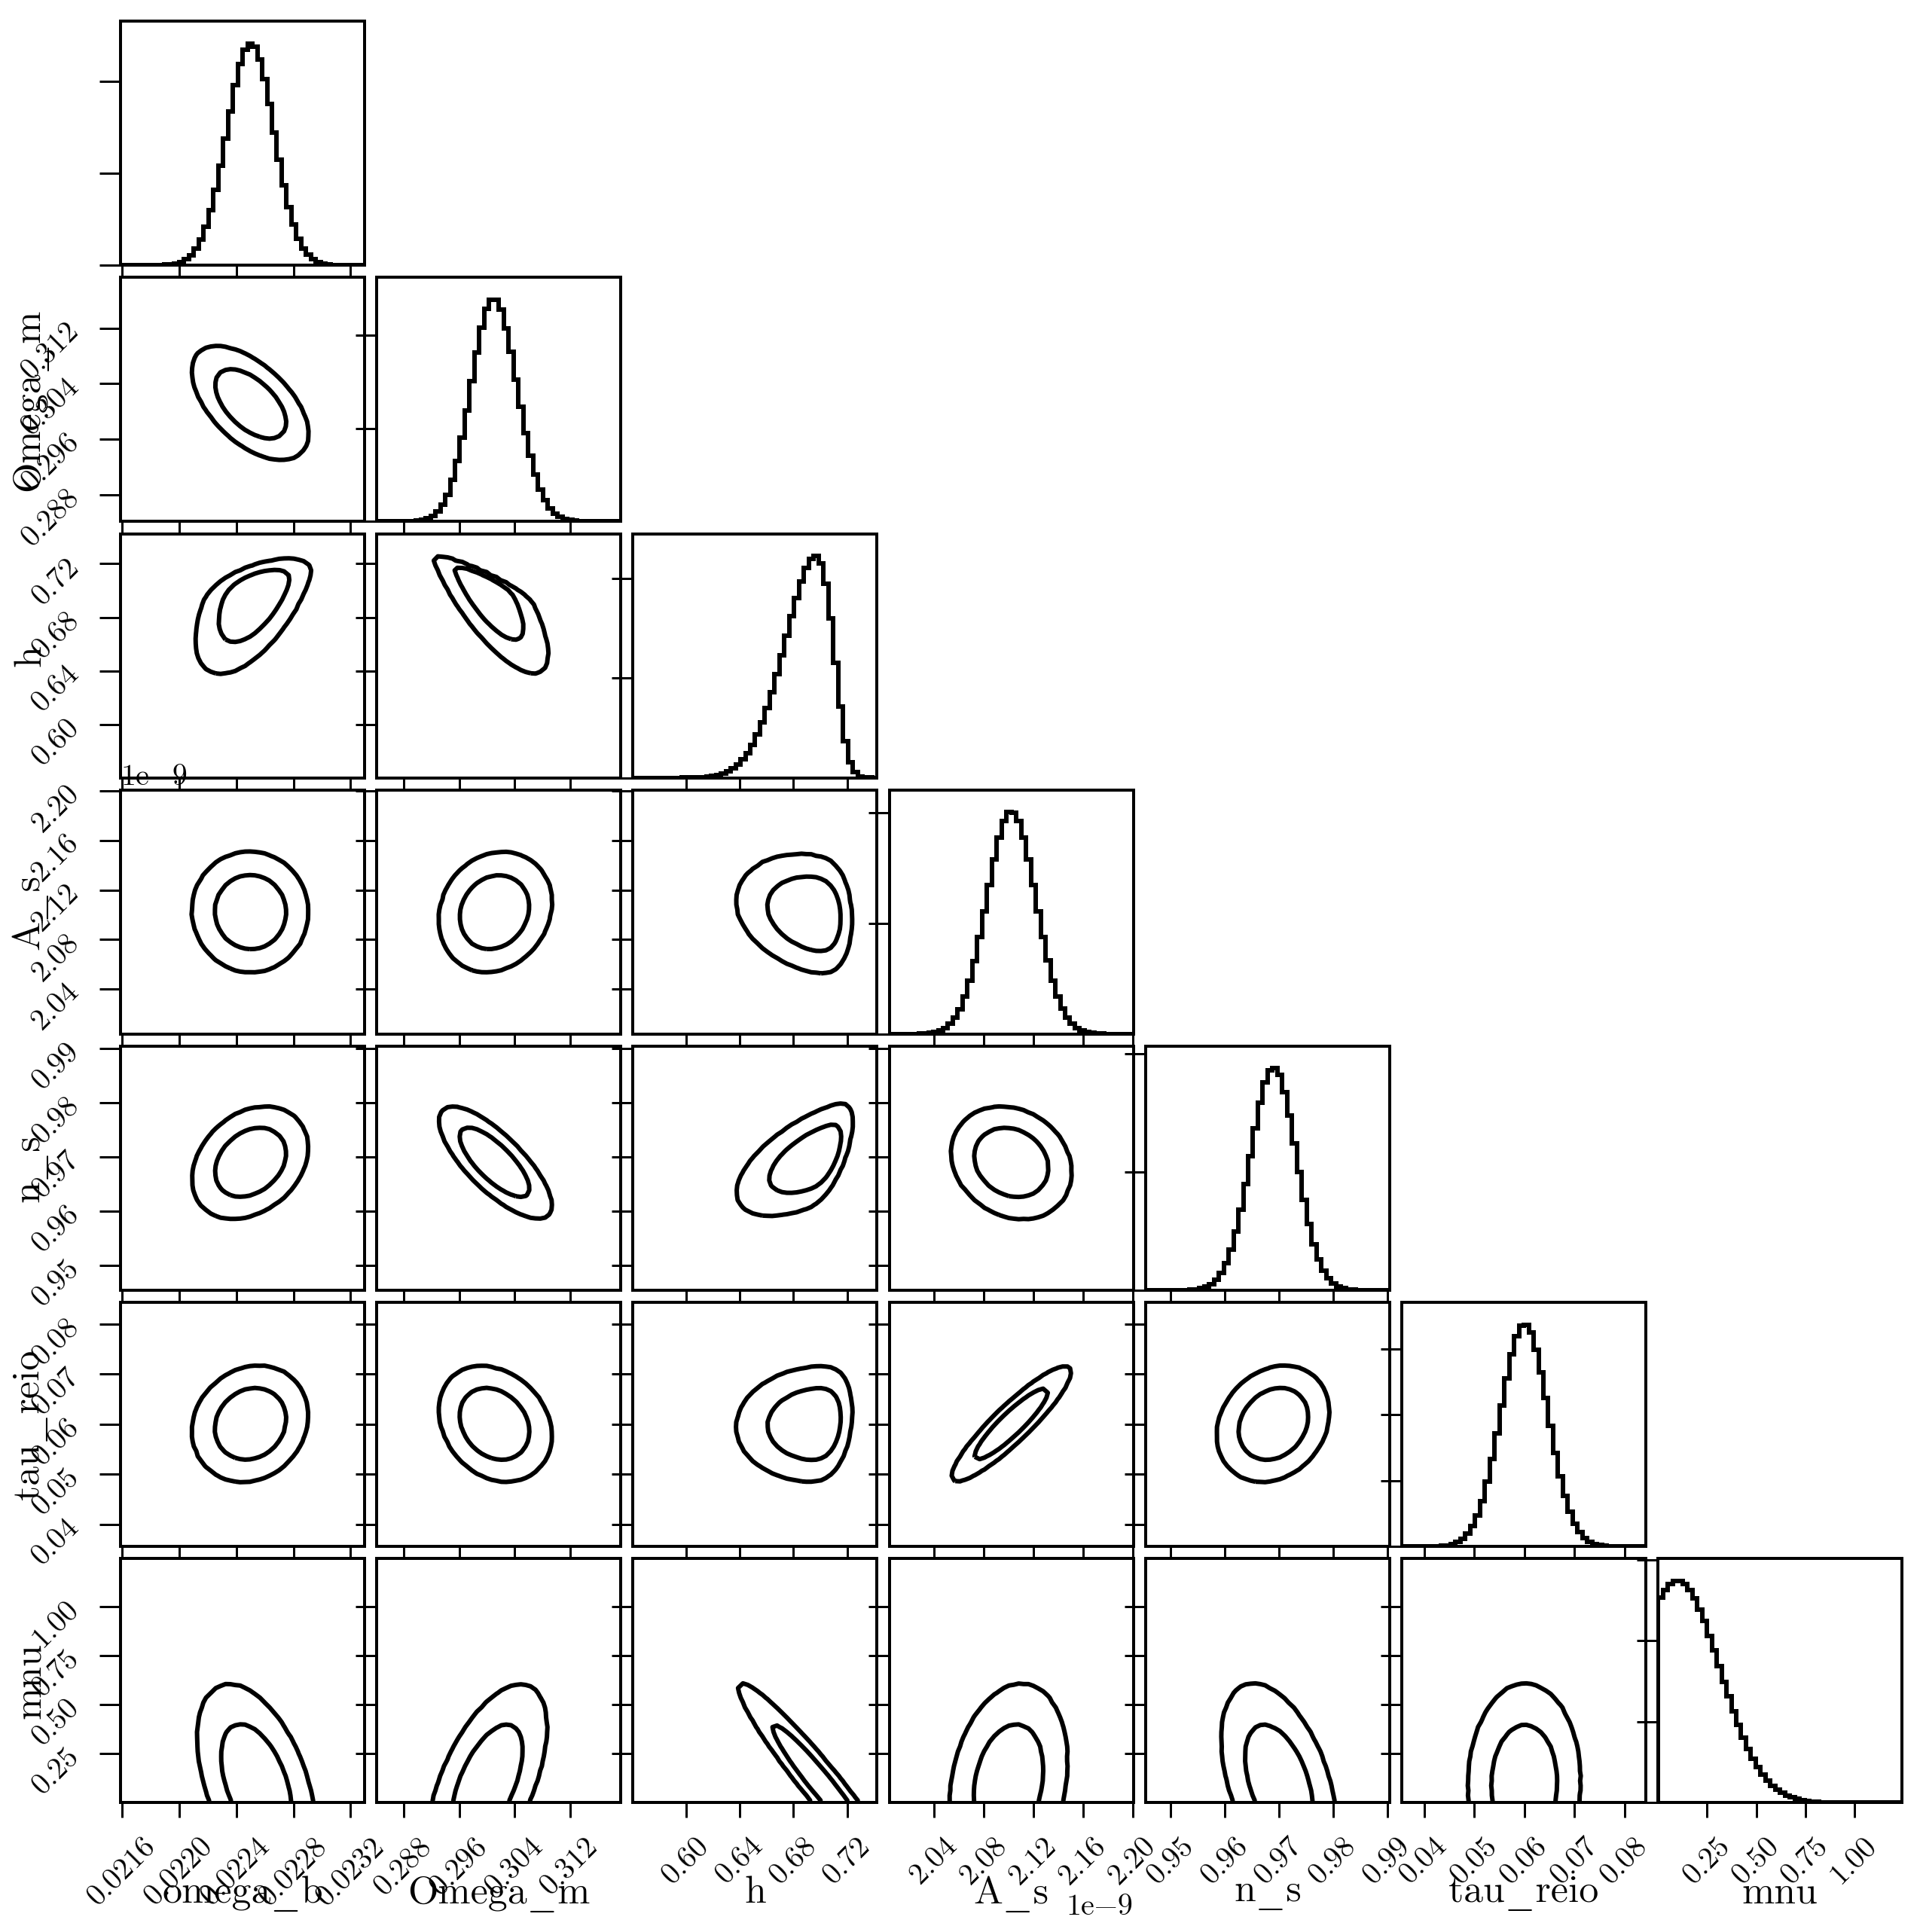

In [48]:
npar = cov.shape[0]
fig, ax = plt.subplots(npar, npar, figsize=(18,18))

corner.corner(samps,
              plot_datapoints=False, plot_density=False, bins=50, 
              levels=(0.68,0.95), lw=2, fig=fig,
              hist_kwargs={'density':True}, labels=[r'omega_b', r'Omega_m', r'h',  r'A_s', r'n_s', r'tau_reio', 'mnu']);

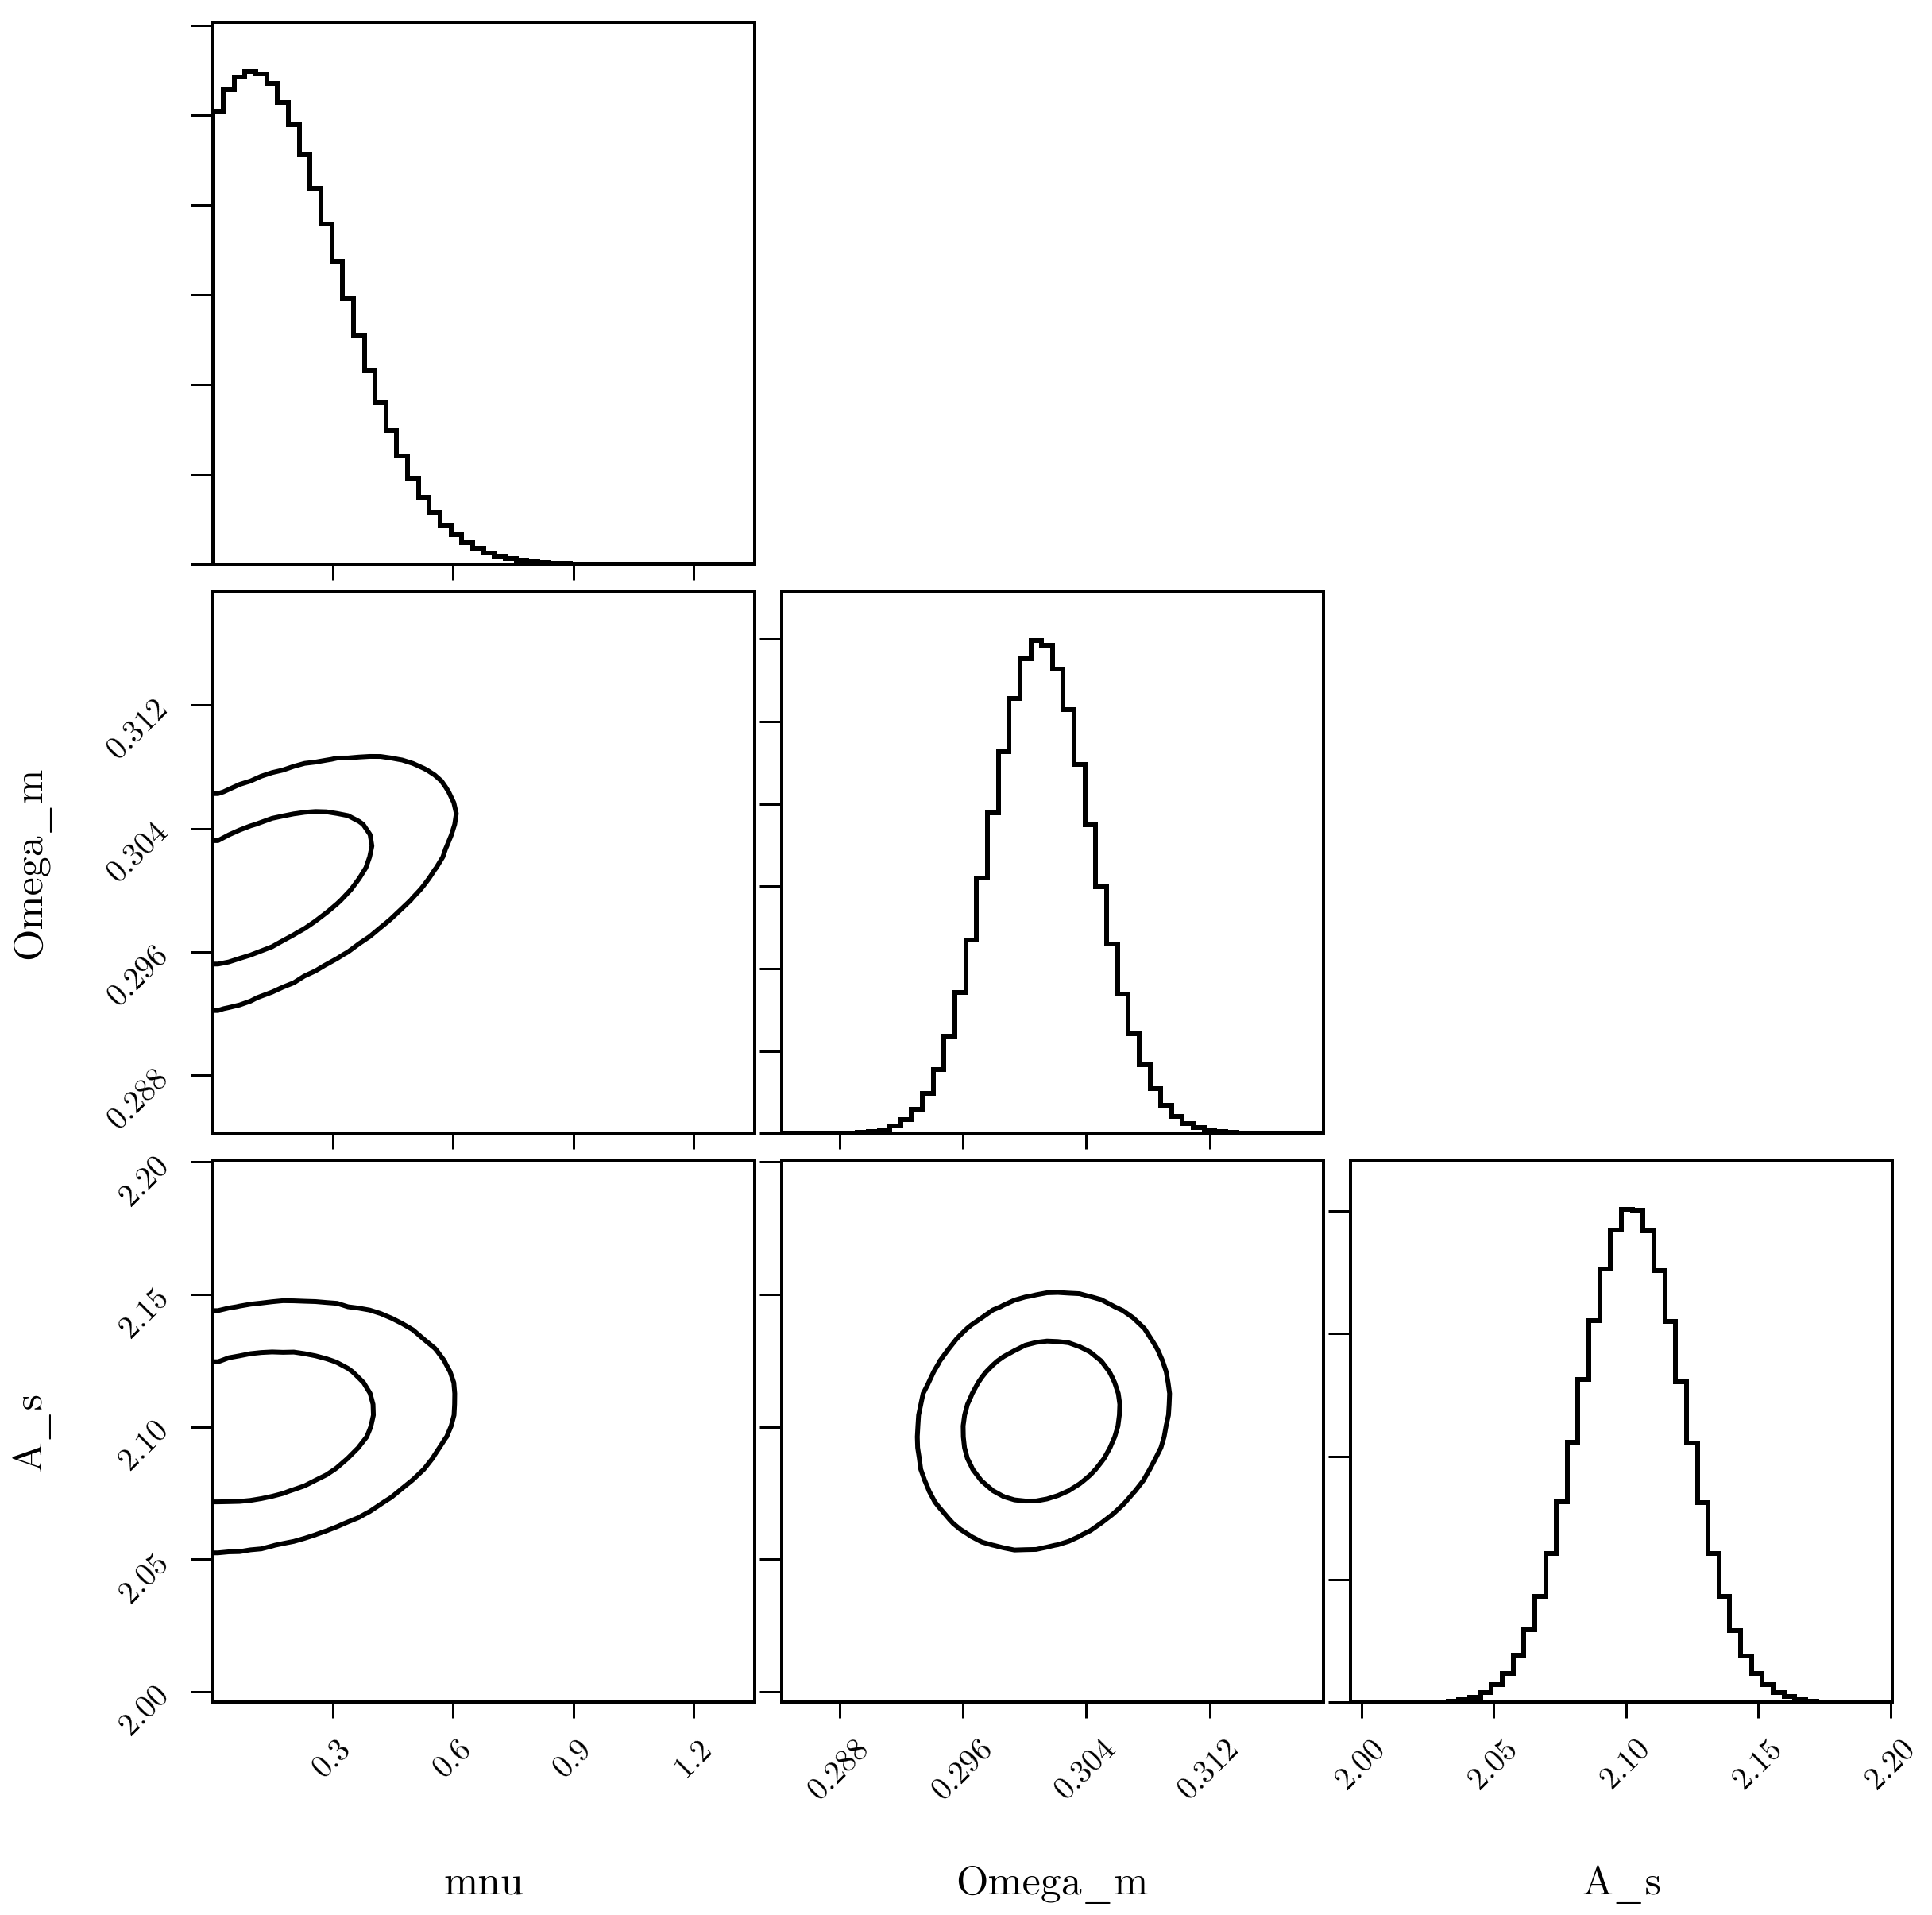

In [49]:
npar = subcov.shape[0]
fig, ax = plt.subplots(npar, npar, figsize=(18,18))

corner.corner(subsamps,
              plot_datapoints=False, plot_density=False, bins=50, 
              levels=(0.68,0.95), lw=2, fig=fig,
              hist_kwargs={'density':True}, labels=[ 'mnu', 'Omega_m', 'A_s']);

In [50]:
subsamps[:,0]

array([0.28070847, 0.1678362 , 0.02677155, ..., 0.00537466, 0.21262373,
       0.12403554])

[0.48988955] [0.29467837 0.30773943] [2.06360468 2.14109858]
[0.48419633] [0.2885422  0.31020773] [1.99885392 2.79525928]
[0.32298518] [0.29295161 0.31188692] [1.99330061 2.34096046]


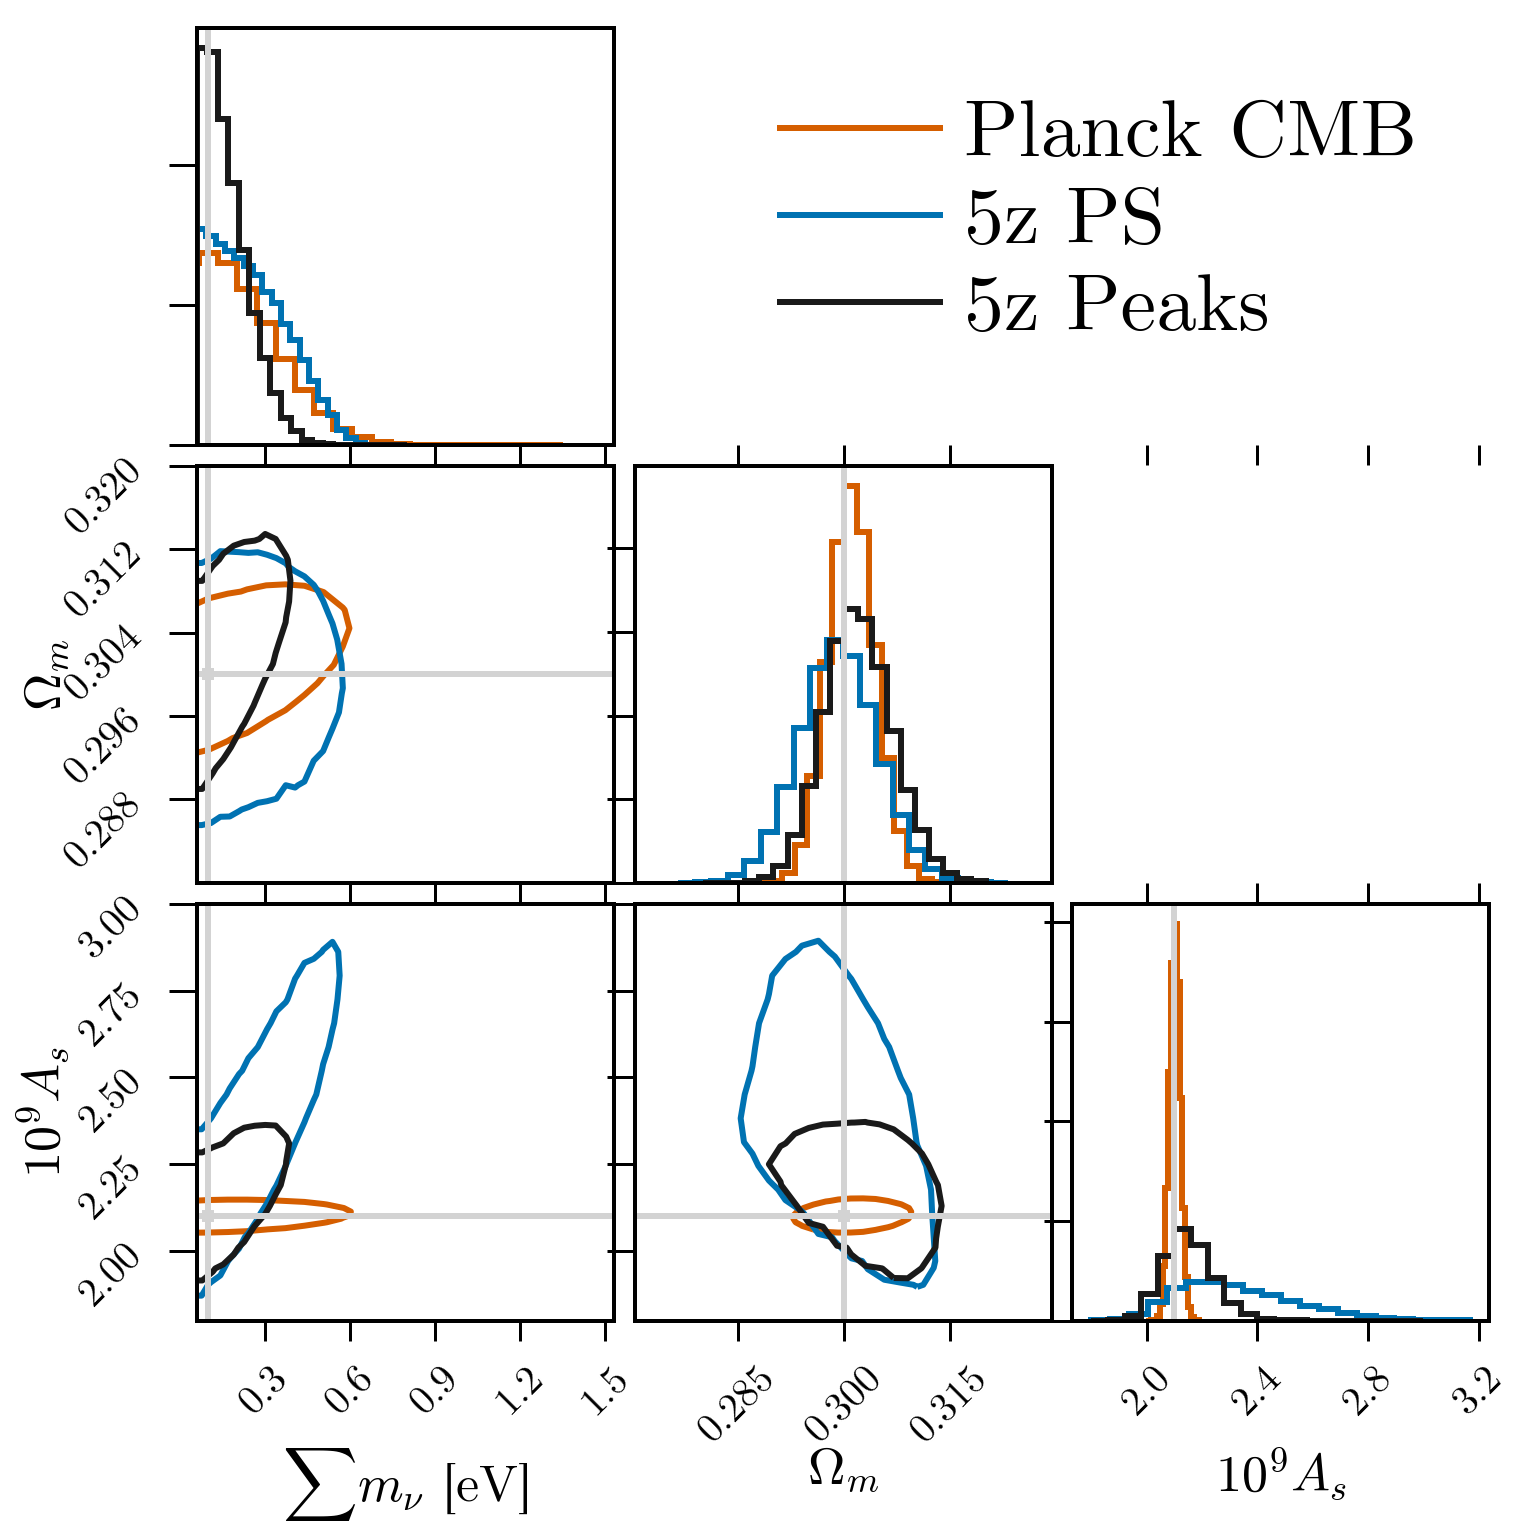

In [64]:
fig, axes = plt.subplots(3,3, figsize=(11,11), sharex="col")

qmnu, qom, qas = (corner.quantile(subsamps[:,0], q=[0.95]),
                  corner.quantile(subsamps[:,1], q=[0.025,0.975]),
                  corner.quantile(subsamps[:,2], q=[0.025,0.975]))
print(qmnu, qom, qas)
fig = corner.corner(subsamps, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, 
                    levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])


chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])



chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    range=((0.06, 0.8), (0.28, 0.32), (1.8, 3.0)),
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])

axes[0,2].plot([],[],color=default_color_list[3], label='Planck CMB')
axes[0,2].plot([],[],color=default_color_list[1], label='5z PS')
axes[0,2].plot([],[],color=default_color_list[0], label='5z Peaks')
axes[0,2].legend(fontsize=40)

for i in range(3):
    axes[i,i].relim()
    axes[i,i].autoscale()
axes[0,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

# axes[2,0].set_xlabel(r'$\sum m_{\nu}$ (eV)', labelpad=50)
# axes[2,2].set_xlabel(r'$10^9 A_s$', labelpad=50)

# axes[1,0].set_ylabel(r'$\Omega_m$', labelpad=80)
# axes[2,0].set_ylabel(r'$10^9 A_s$', labelpad=50)

fig.savefig('figures/5z_PS_peaks_cmb.pdf')

In [66]:
from scipy.stats import multivariate_normal

def get_weights(x):
    scales = 1./np.sqrt(np.diag(subcov))
    # adjust 
    x_copy = x.copy()
    x_copy[:,-1] *= 1e-9
    return multivariate_normal.pdf(x_copy * scales, 
                                        mean=subcenters * scales, 
                                        cov=unitize_cov(subcov, scales) )

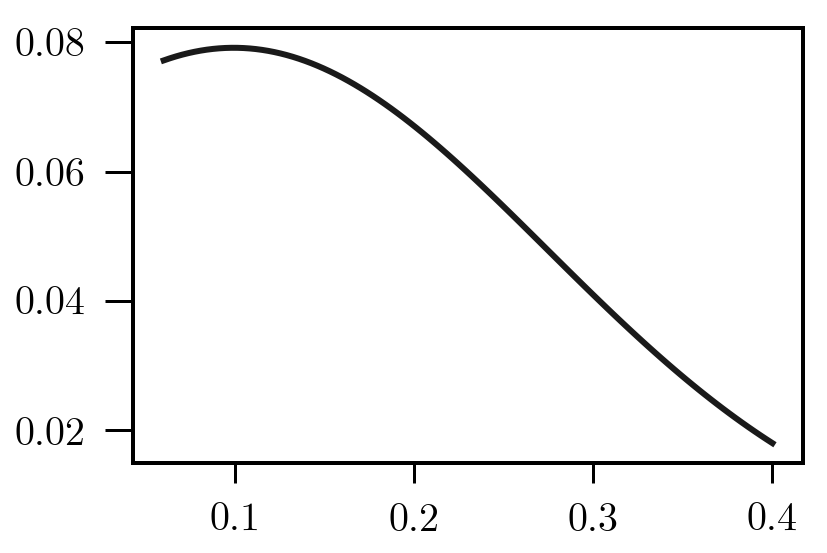

In [67]:
samp_test_1 = np.array( [ 
    0.1*np.ones(100), 0.3*np.ones(100), np.linspace(1.9,2.5,100) ] ).T
samp_test_2 = np.array( [ 
    0.1*np.ones(100), 0.3*np.ones(100), 2.1*np.ones(100) ] ).T
samp_test_3 = np.array( [ 
    np.linspace(0.06,0.4,100) , 0.3*np.ones(100), 2.1*np.ones(100) ] ).T


plt.plot( samp_test_3[:,0], get_weights(samp_test_3) )

In [68]:
scales = 1./np.sqrt(np.diag(subcov))
# adjust 
x_copy = samples.copy()
x_copy[:,-1] *= 1e-9

multivariate_normal.pdf( np.array([0.1, 0.3, 2.1e-9]) * scales, 
                                    mean=subcenters * scales, 
                                    cov=unitize_cov(subcov, scales) )

0.07914052707417348

In [69]:
samples

array([[0.09897514, 0.30052262, 2.09903519],
       [0.11564023, 0.3019204 , 2.09321984],
       [0.10000029, 0.30090041, 2.09972172],
       ...,
       [0.10961418, 0.29912863, 2.12777237],
       [0.11007016, 0.30152351, 2.08925076],
       [0.30622348, 0.30408225, 2.29387774]])

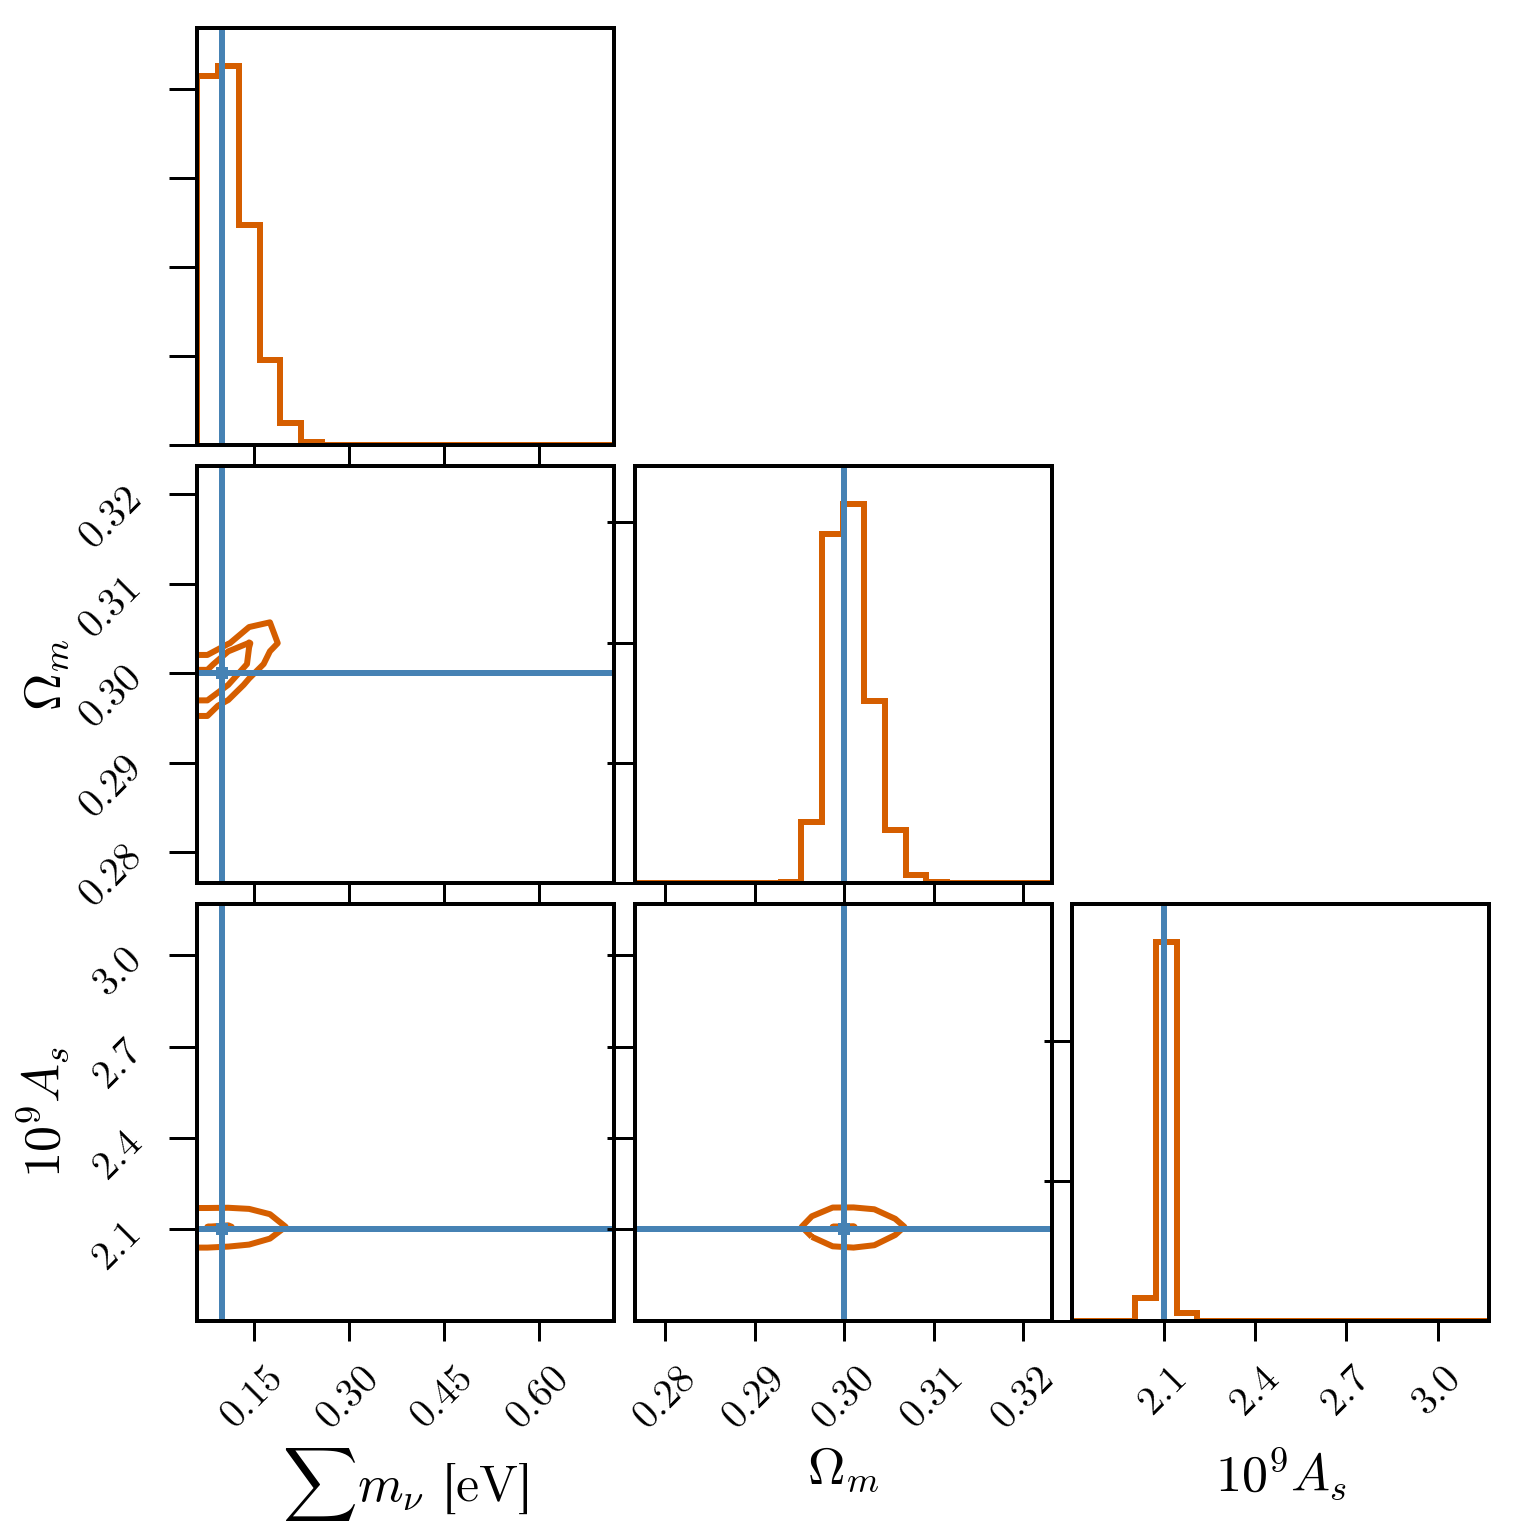

In [70]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, weights=get_weights(samples),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])

In [71]:
np.sqrt(np.diag(subcov))

array([2.13737782e-01, 3.64597104e-03, 2.00330778e-11])

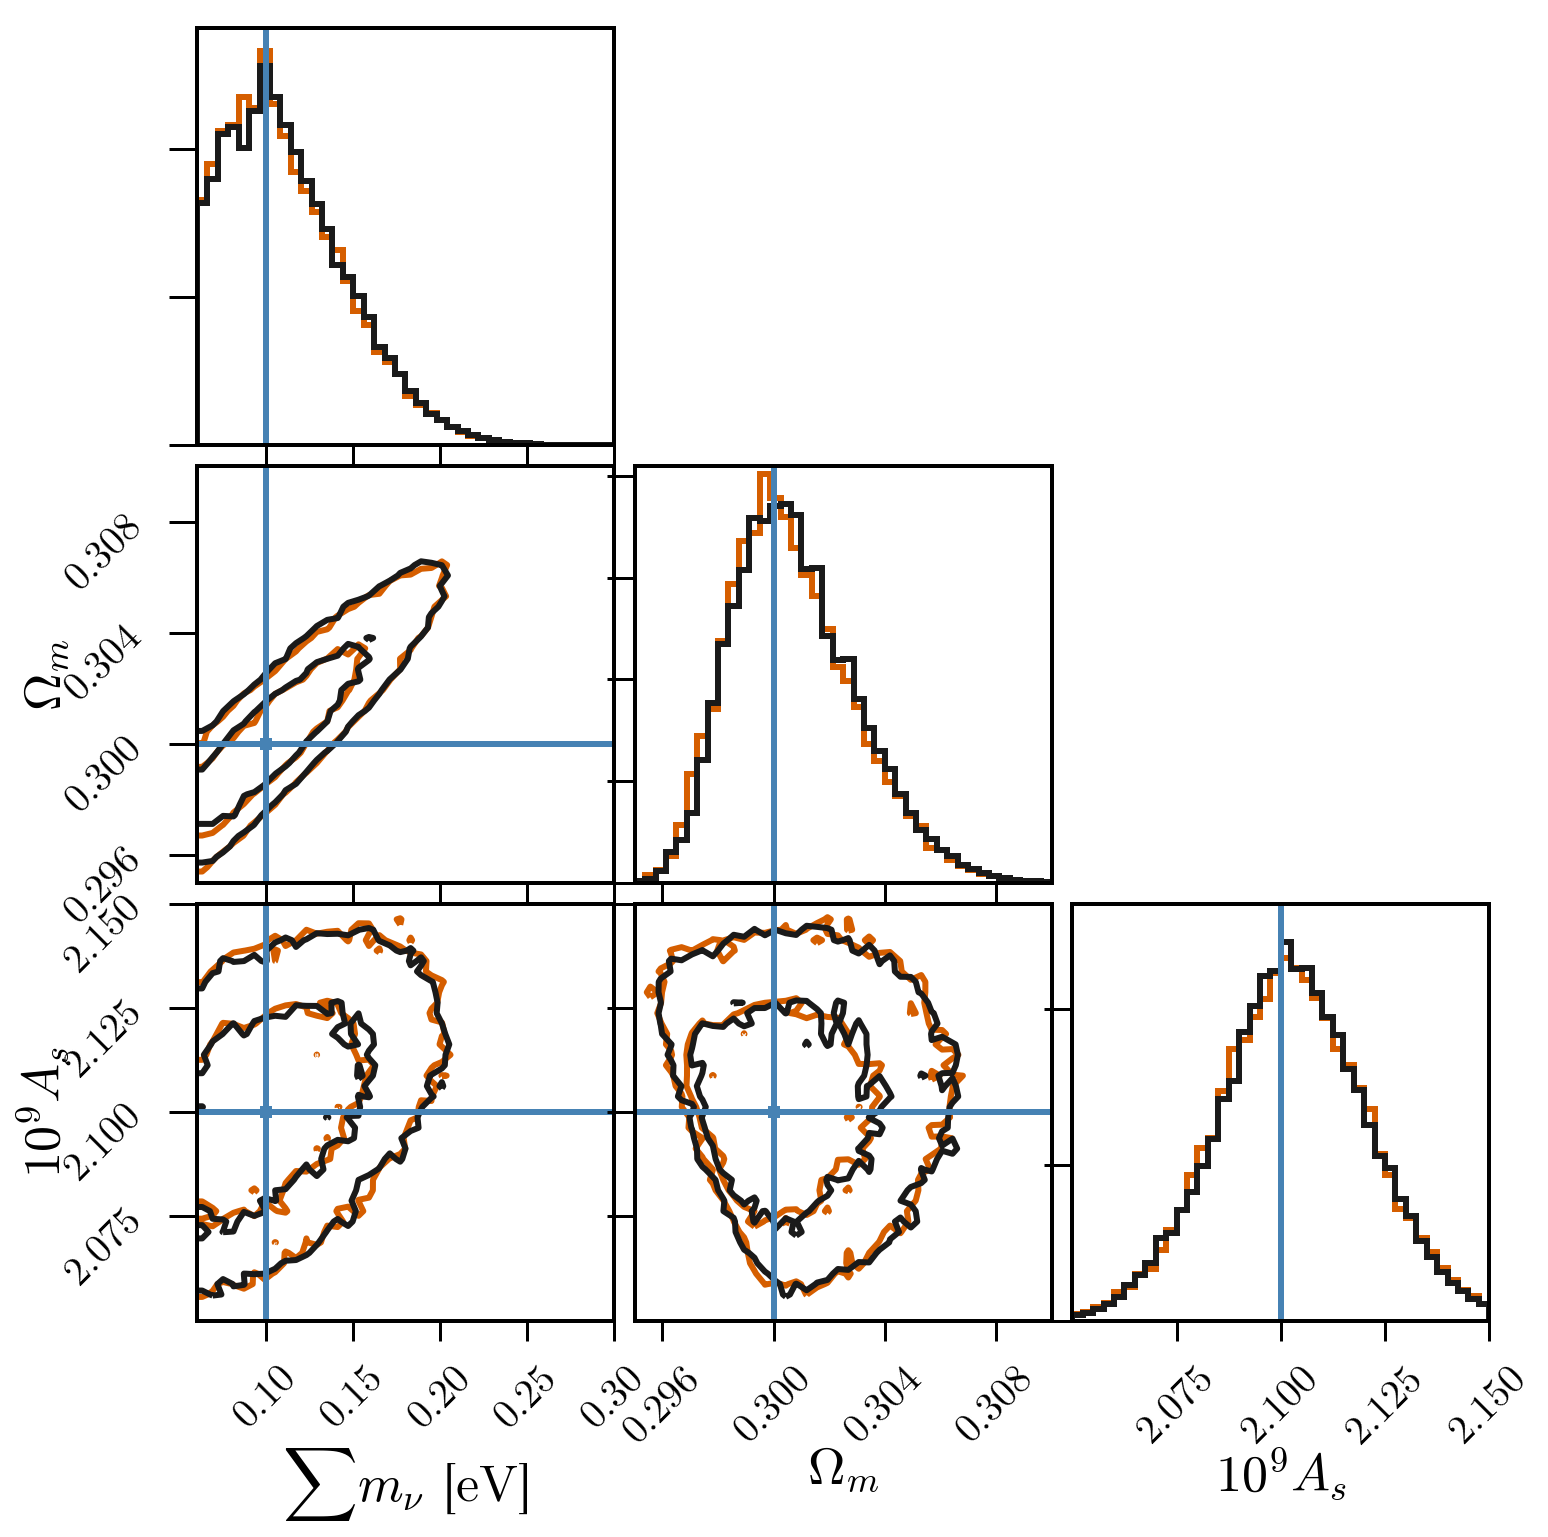

In [72]:
fig, axes = plt.subplots(3,3, figsize=(11,11))

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])


chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95),
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0])


In [73]:
range_list = [ [0.06, 0.8], [0.288, 0.312], [1.95, 2.4]  ]

[0.29506172] [0.29334579 0.3088128 ] [2.02112874 2.34358672]
[0.17670116250013046] [0.2969885498195648, 0.30562825878858496] [2.066997315571674, 2.139646483238973]
[0.17716485891896736] [0.2971046855459311, 0.305770580906845] [2.0675411167335, 2.139146324921515]
[0.17216339472223716] [0.29722263315982494, 0.3052638078037218] [2.069174024904691, 2.139996634377997]


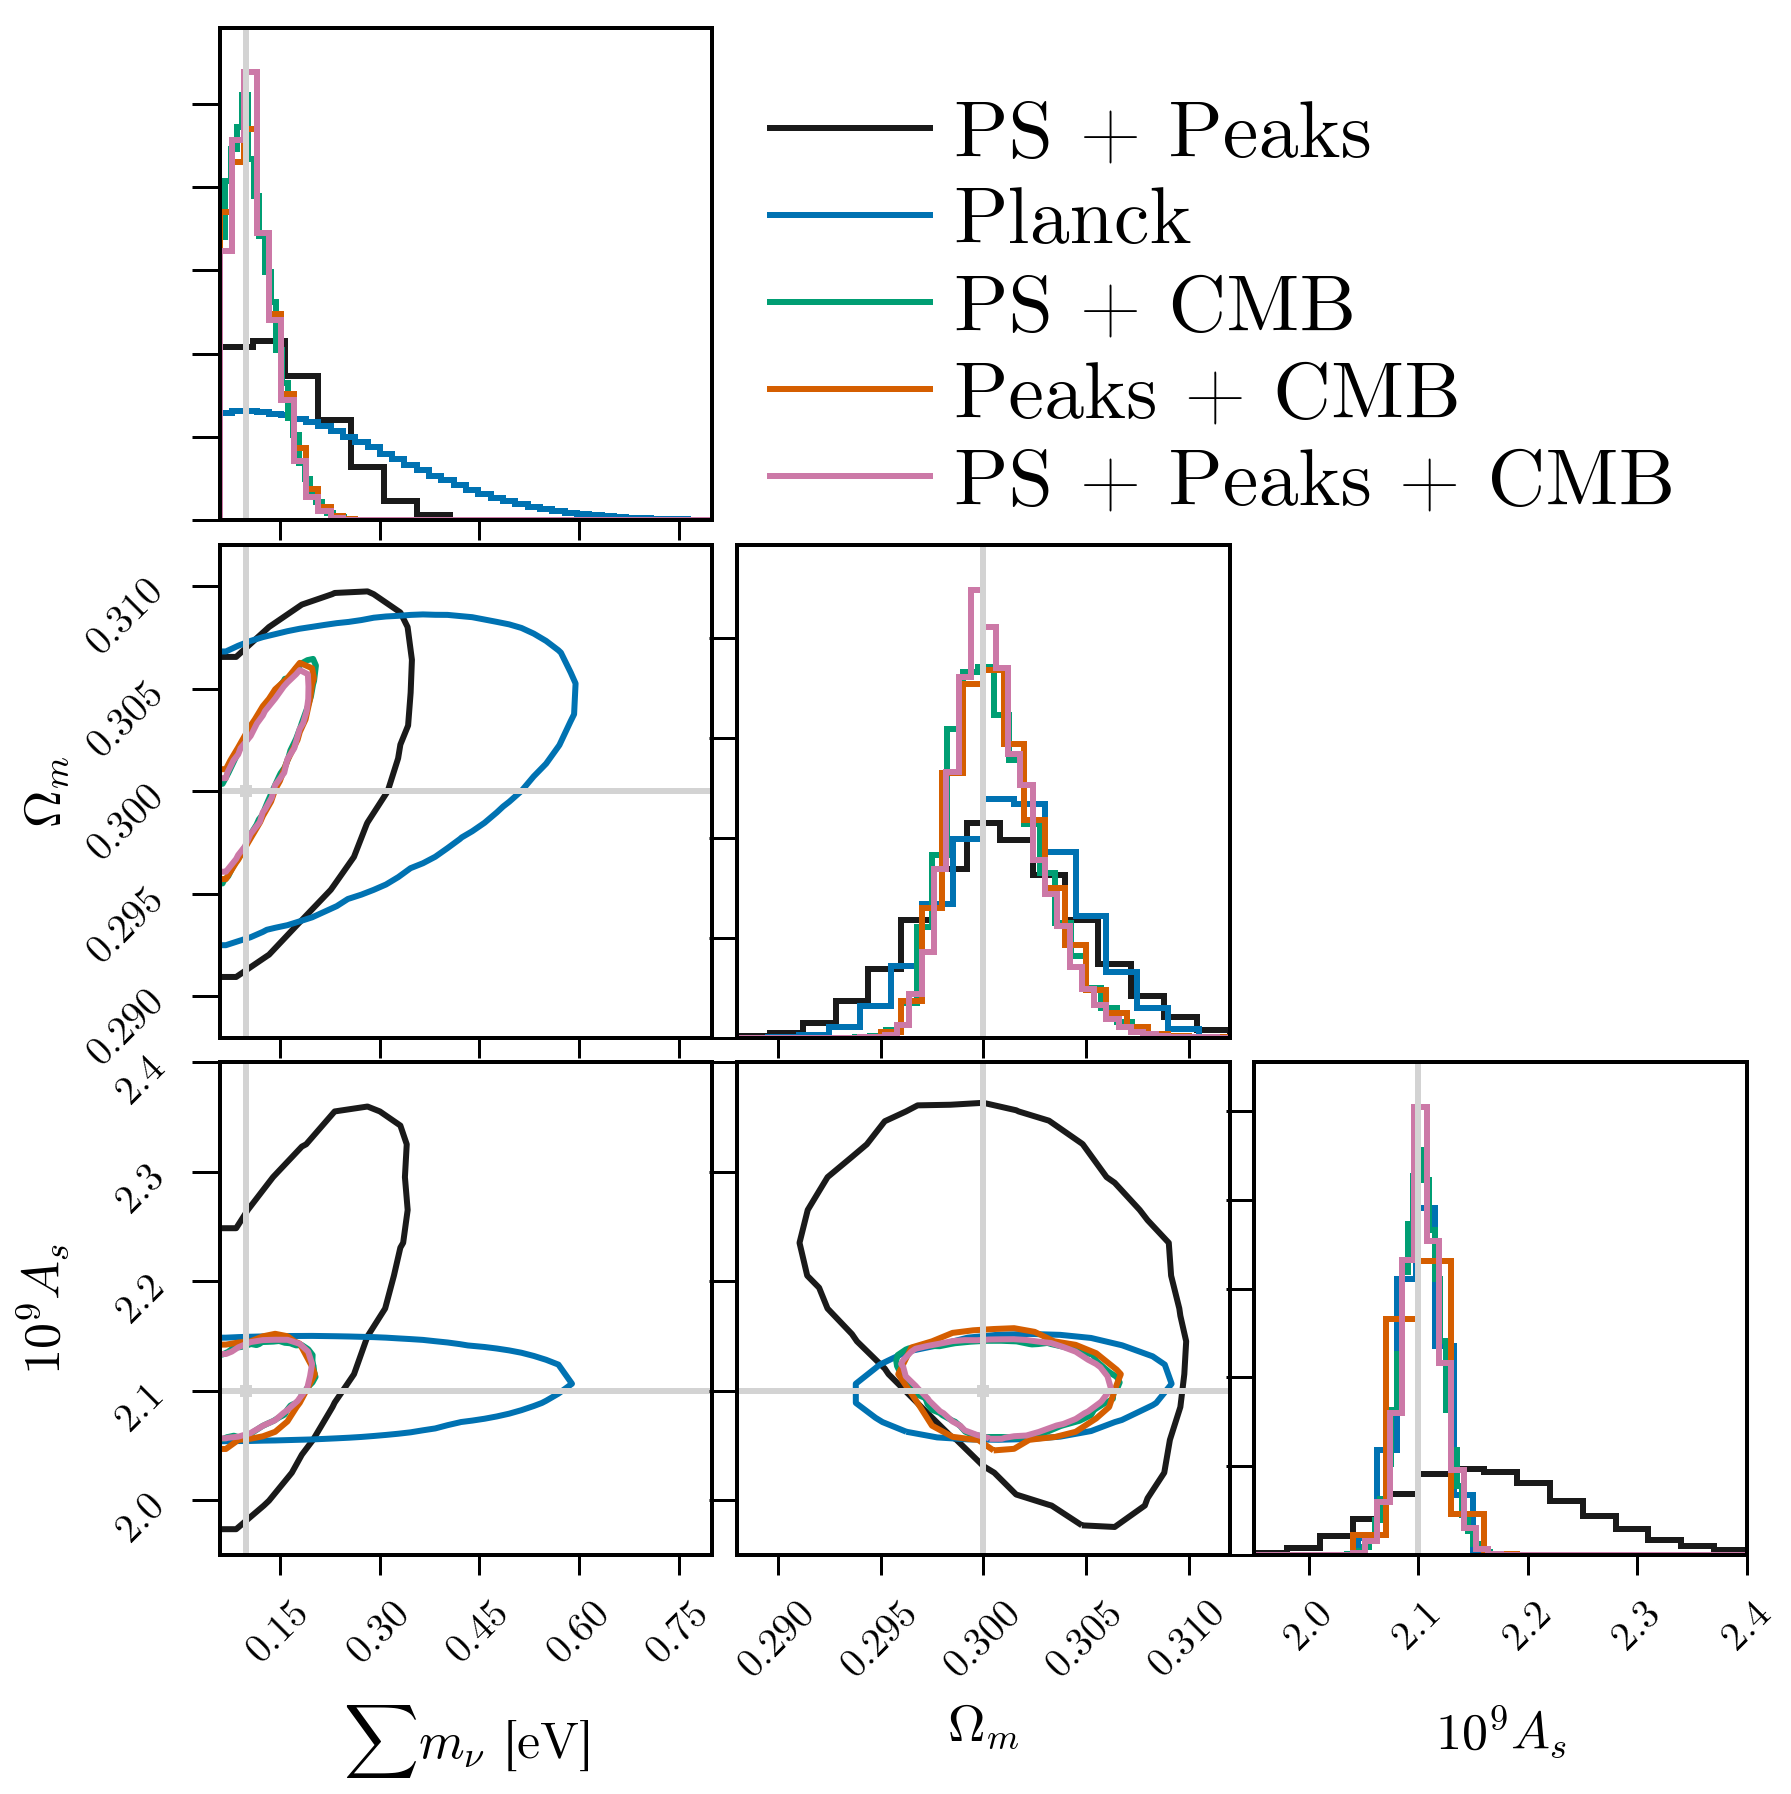

In [75]:
num = 10000000
unif = np.array( [np.random.uniform(0.06, 0.8, num),
                  np.random.uniform(0.29, 0.31, num),
                  np.random.uniform(2.05, 2.15, num)] ).T

fig, axes = plt.subplots(3,3, figsize=(13,13))



chain = ascii.read("chains/combo12.out")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95]),
                  corner.quantile(chain['col3'], q=[0.025,0.975]),
                  corner.quantile(chain['col4'], q=[0.025,0.975]))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, bins=15,
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    range=range_list,
                    truths=params.T[1], fig=fig, 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[0],
                    levels=(0.95,),
                    truth_color="#d3d3d3")


# chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
# samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
# fig = corner.corner(samples, #weights=get_weights(samples), bins=40,
# #                     range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
#                     plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
#                     labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
#                     truths=params.T[1], fig=fig, levels=(0.95,),
#                     truth_color="#d3d3d3",
#                     label_kwargs={'labelpad':300},
#                     color=default_color_list[1])


# chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
# samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
# fig = corner.corner(samples, #weights=get_weights(samples), bins=40,
# #                     range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
#                     plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
#                     labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
#                     truths=params.T[1], fig=fig, levels=(0.95,),
#                     truth_color="#d3d3d3",
#                     label_kwargs={'labelpad':300},
#                     color=default_color_list[0])


fig = corner.corner(unif, weights=get_weights(unif), bins=40,
                    range=((0.06, 0.8), (0.27, 0.33), (1.8, 2.5) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95], weights=get_weights(samples)),
                  corner.quantile(chain['col3'], q=[0.025,0.975], weights=get_weights(samples)),
                  corner.quantile(chain['col4'], q=[0.025,0.975], weights=get_weights(samples)))
print(qmnu, qom, qas)
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    range=((0.06, 0.4), (0.29, 0.32), (2.0, 2.2) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[2])


chain = ascii.read("chains/Peaks_6_19020342.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95], weights=get_weights(samples)),
                  corner.quantile(chain['col3'], q=[0.025,0.975], weights=get_weights(samples)),
                  corner.quantile(chain['col4'], q=[0.025,0.975], weights=get_weights(samples)))
print(qmnu, qom, qas)
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    range=((0.06, 0.8), (0.28, 0.32), (1.8, 3.0)),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.95,),
                    truth_color="#d3d3d3",
                    label_kwargs={'labelpad':300},
                    color=default_color_list[3])



chain = ascii.read("chains/combo12.out")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
qmnu, qom, qas = (corner.quantile(chain['col2'], q=[0.95], weights=get_weights(samples)),
                  corner.quantile(chain['col3'], q=[0.025,0.975], weights=get_weights(samples)),
                  corner.quantile(chain['col4'], q=[0.025,0.975], weights=get_weights(samples)))
print(qmnu, qom, qas)
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    range=range_list,
                    truths=params.T[1], fig=fig, 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[4],
                    levels=(0.95,),
                    truth_color="#d3d3d3")



axes[0,2].plot([],[],color=default_color_list[0], label='PS + Peaks')
axes[0,2].plot([],[],color=default_color_list[1], label='Planck')
axes[0,2].plot([],[],color=default_color_list[2], label='PS + CMB')
axes[0,2].plot([],[],color=default_color_list[3], label='Peaks + CMB')
axes[0,2].plot([],[],color=default_color_list[4], label='PS + Peaks + CMB')

for i in range(3):
    axes[i,0].set_xlim(0.06, axes[0,0].get_xlim()[1])

axes[0,2].legend(fontsize=40)

fig.savefig('figures/CMB_comparison_combinations.pdf')

In [72]:
0.323 / 0.54

0.5981481481481481

In [67]:

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
As_samps = samples[ np.abs(samples[:,-1]-2.1) < 0.03 ]   
om_m_samps = As_samps[ np.abs(As_samps[:,1]-0.3) < 0.005 ]

In [32]:
om_m_samps.shape

NameError: name 'om_m_samps' is not defined

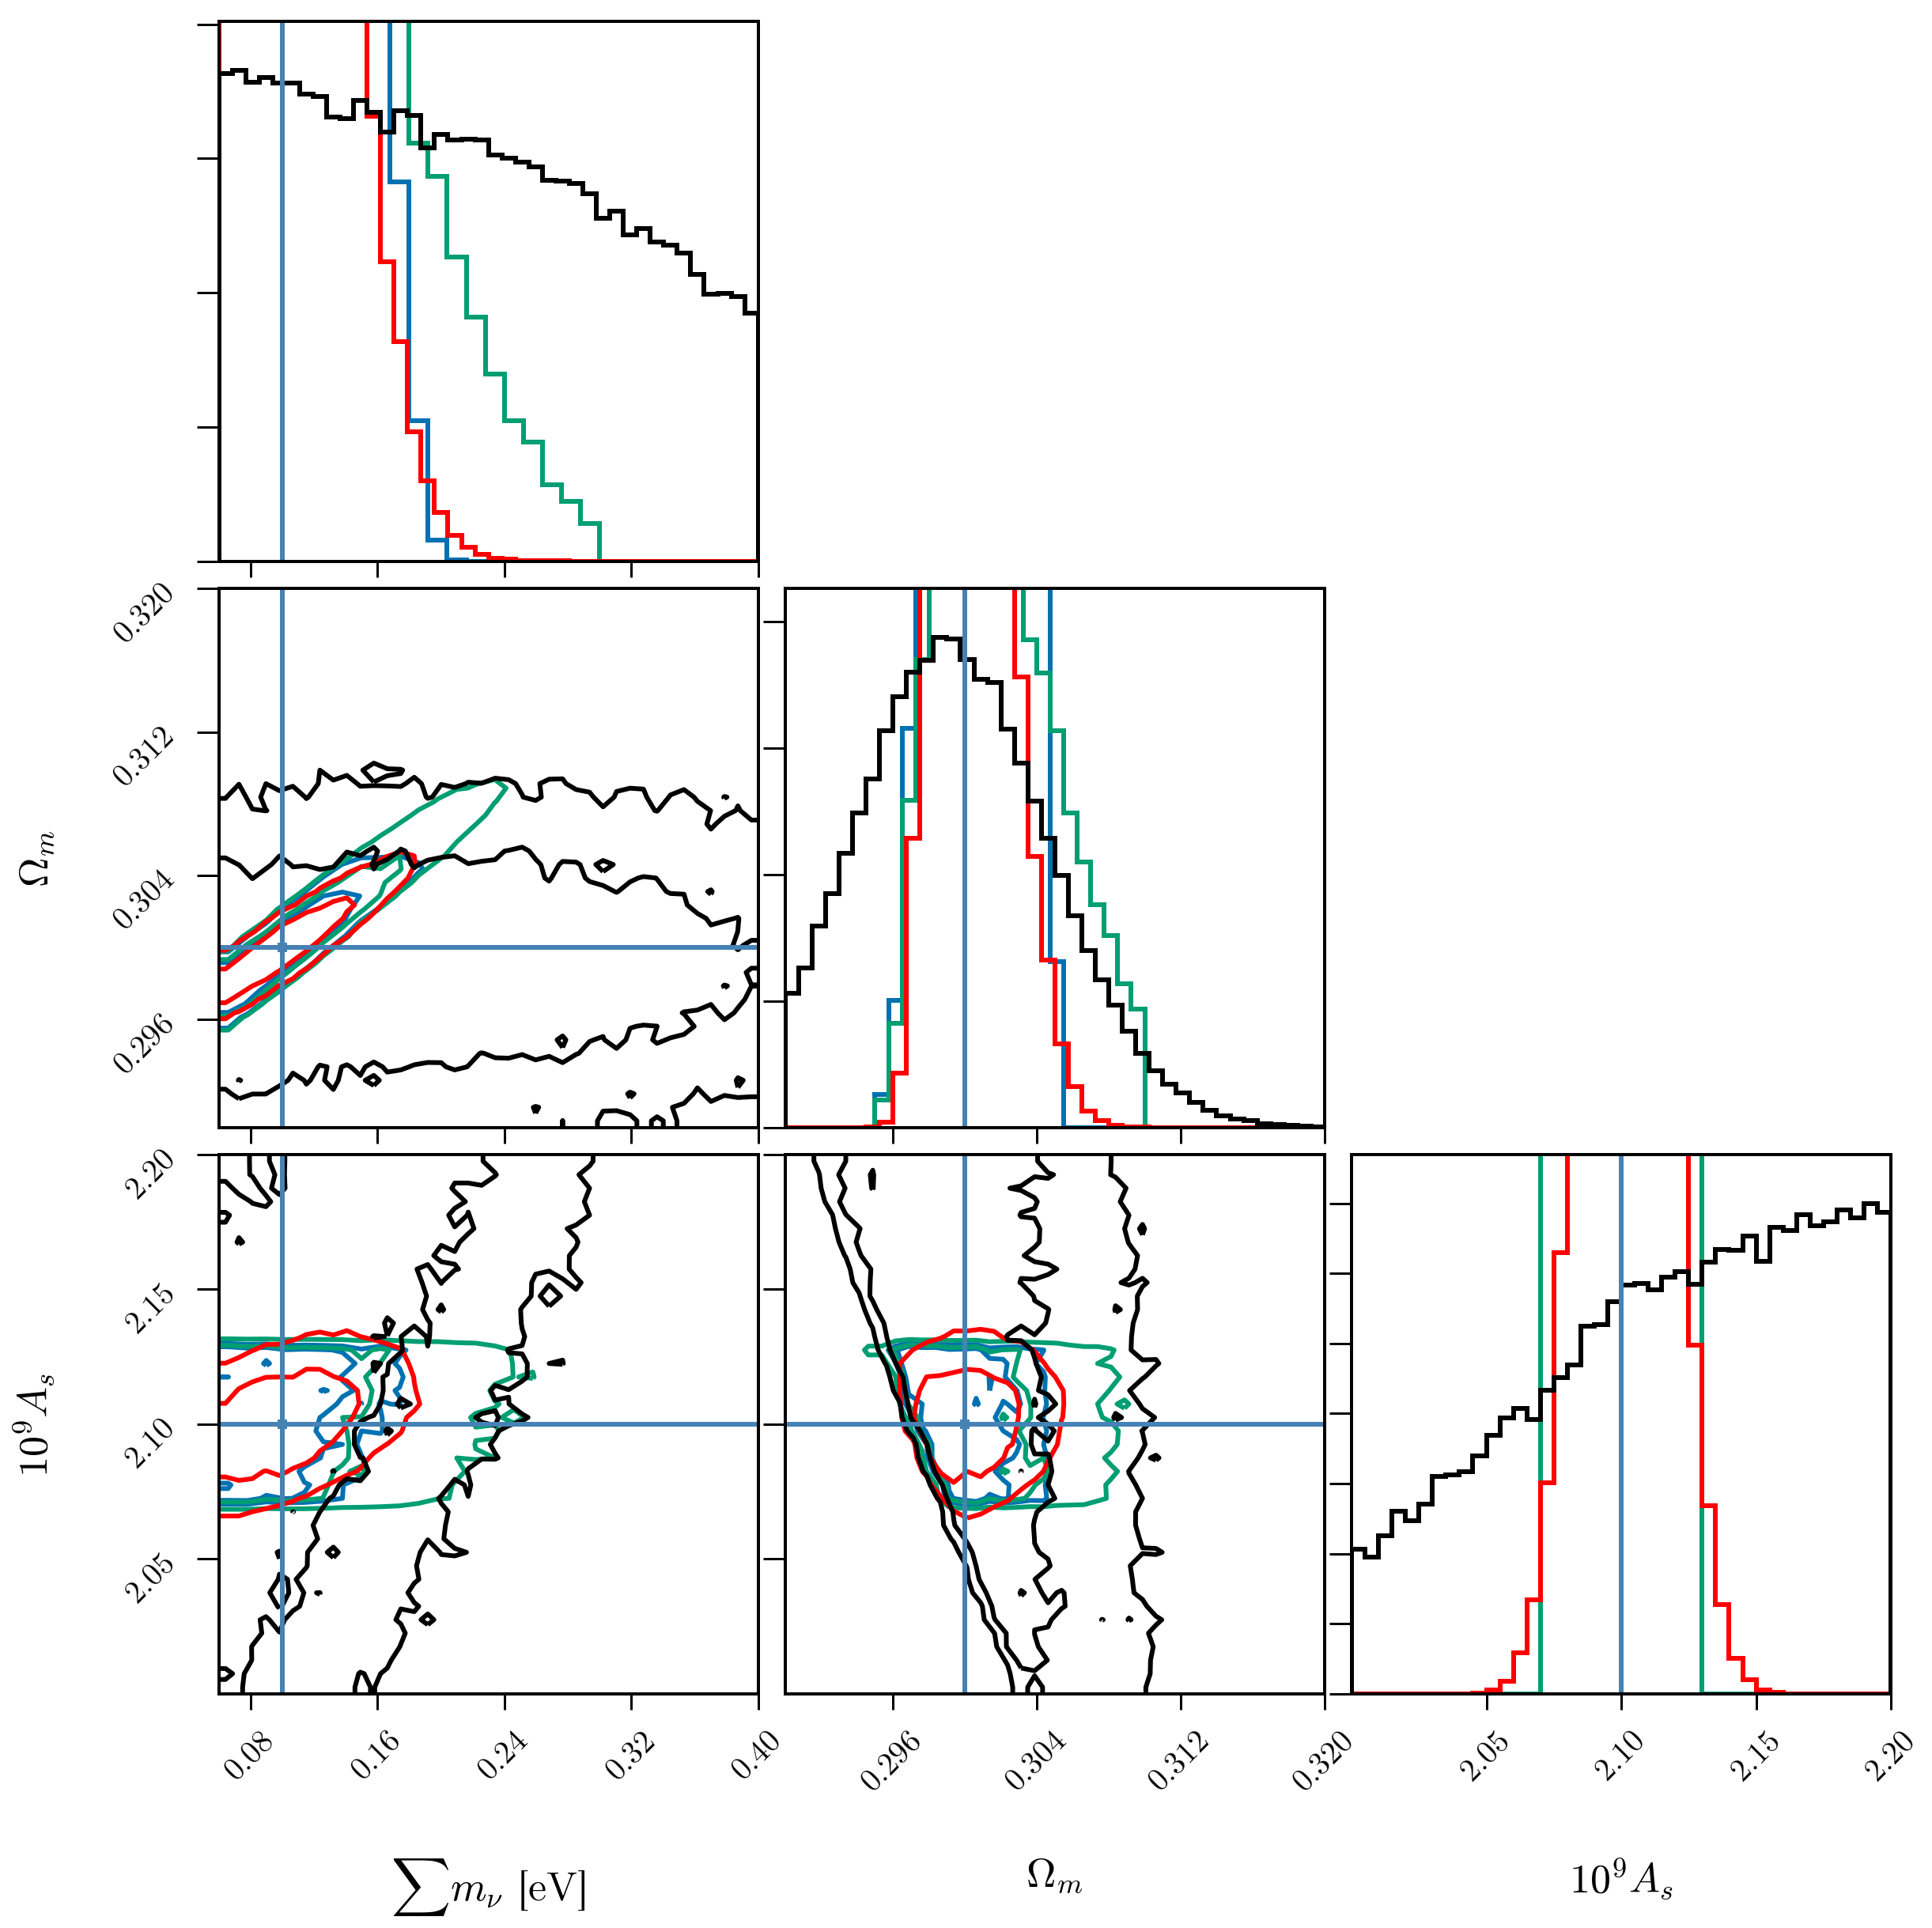

In [64]:

fig, axes = plt.subplots(3,3, figsize=(18,18))


# fig = corner.corner(samples, #weights=get_weights(samples), bins=40,
# #                     range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
#                     plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
#                     labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
#                     truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
#                     label_kwargs={'labelpad':300},
#                     color=default_color_list[1])

fig = corner.corner(om_m_samps, #weights=get_weights(samples), bins=40,
                    range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[1])


fig = corner.corner(As_samps, #weights=get_weights(samples), bins=40,
                    range=((0.06, 0.3), (0.295, 0.31), (2.05, 2.15) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color=default_color_list[2])


chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples, weights=get_weights(samples), bins=40,
                    range=((0.06, 0.4), (0.29, 0.32), (2.0, 2.2) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color='red')

chain = ascii.read("chains/PS_2_19020347.dat")[1200:]
samples = np.array( [chain['col2'],chain['col3'],chain['col4']] ).T
fig = corner.corner(samples,  bins=40,
                    range=((0.06, 0.4), (0.29, 0.32), (2.0, 2.2) ),
                    plot_datapoints=False, plot_density=False, hist_kwargs={'density':True},
                    labels=[r"$\sum m_{\nu}$ [eV]", r"$\Omega_m$", r"$10^9 A_s$"],
                    truths=params.T[1], fig=fig, levels=(0.68, 0.95), 
                    label_kwargs={'labelpad':300},
                    color='black')

Text(0.5,0,'$\\sum m_{\\nu}$ (eV)')

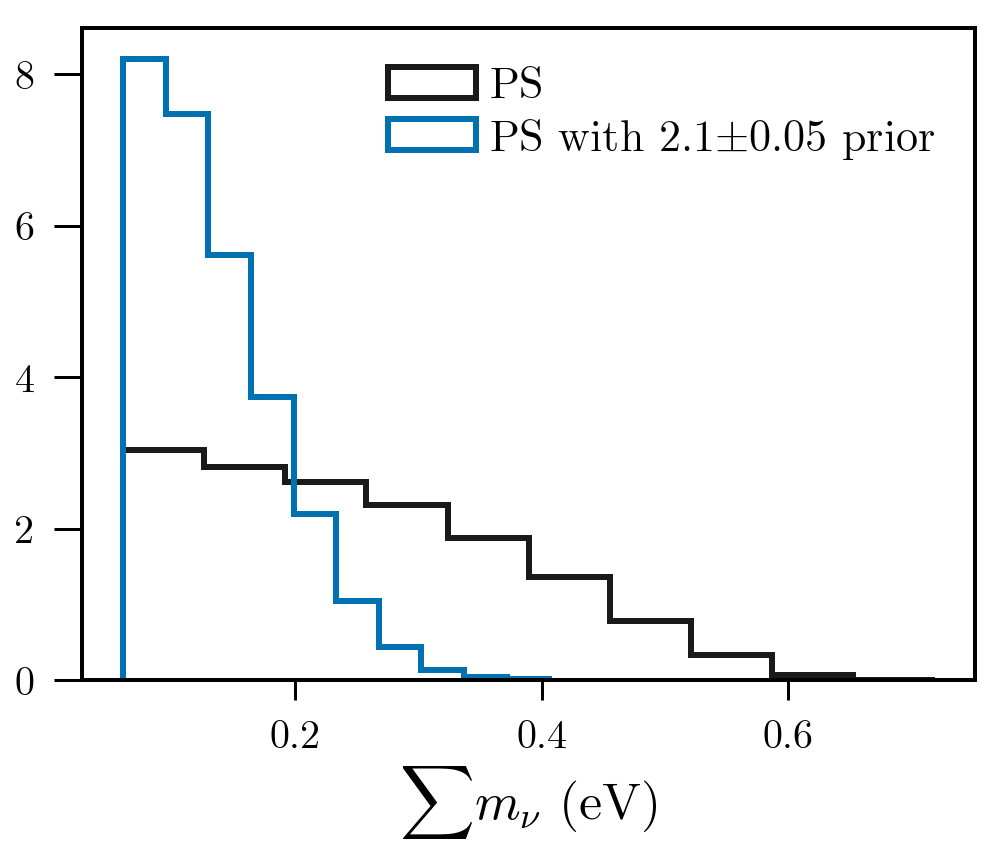

In [31]:
plt.figure(figsize=(8,6))
plt.hist( samples[:,0], density=True, histtype='step', label='PS' )
plt.hist( , density=True, histtype='step', label='PS with 2.1$\pm$0.05 prior' )

plt.legend()
plt.xlabel(r'$\sum m_{\nu}$ (eV)')